### House Grade Classification


Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing 
various houses into different grades based on various parameters. This would help agents in identifying 
the type of house a customer is looking for. This way, the search for the house can be narrowed down 
by focusing only on the ‘condition of the house’.

The Grade (condition of the house that ranges from A (Best) - E (Worst) ) can also be used by existing 
owners to list their properties for sale. Grading helps them in arriving at a price of the house.

### Importing libraries


In [1]:
# pandas and numpy
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder                 # converting categorical to numerical
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to normalize and standadize the data

# Splitting 
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,LeaveOneOut,cross_val_score,RepeatedStratifiedKFold

# Classifier Models
from sklearn.linear_model import LogisticRegression                                             # logistic regression
from sklearn.naive_bayes import GaussianNB                                                      # Naive Bayes
from sklearn.tree import DecisionTreeClassifier,plot_tree                                       # Decision Tree calssifier
from sklearn.ensemble import RandomForestClassifier                                             # Random Forest Classifier
from sklearn.ensemble import StackingClassifier                                                 # Stacking Classifier
from sklearn.ensemble import AdaBoostClassifier                                                 # AdaBoost Classifier

# Evaluations
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

# Grid search
from sklearn.model_selection import GridSearchCV

### Reading the data

In [2]:
df=pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [3]:
df.shape

(3000, 14)

##### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


##### Describe

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


##### dtypes

In [6]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

##### Checking for null values

In [7]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

##### Numerical columns

In [8]:
a =  df.select_dtypes(exclude='object')  
a.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,1,339,6,5,4,6,0,76,2,79,6,3481
1,2,358,5,4,3,4,71,96,3,72,4,3510
2,3,324,7,5,4,5,101,117,5,64,3,3748
3,4,330,6,4,3,5,101,82,2,59,2,3134
4,5,320,7,4,4,5,0,75,3,40,1,3843


##### categorical columns

In [9]:
b =  df.select_dtypes(include='object')  
b.head()

,roof,Grade
0,NO,D
1,YES,D
2,YES,C
3,YES,D
4,NO,D


### EDA

**Grid style**

In [10]:
sb.set(style="darkgrid")

**Numerical Columns**

In [11]:
a.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Expected price'],
      dtype='object')

**Distribution of Numerical columns**

**Histogram for all the numerical columns**

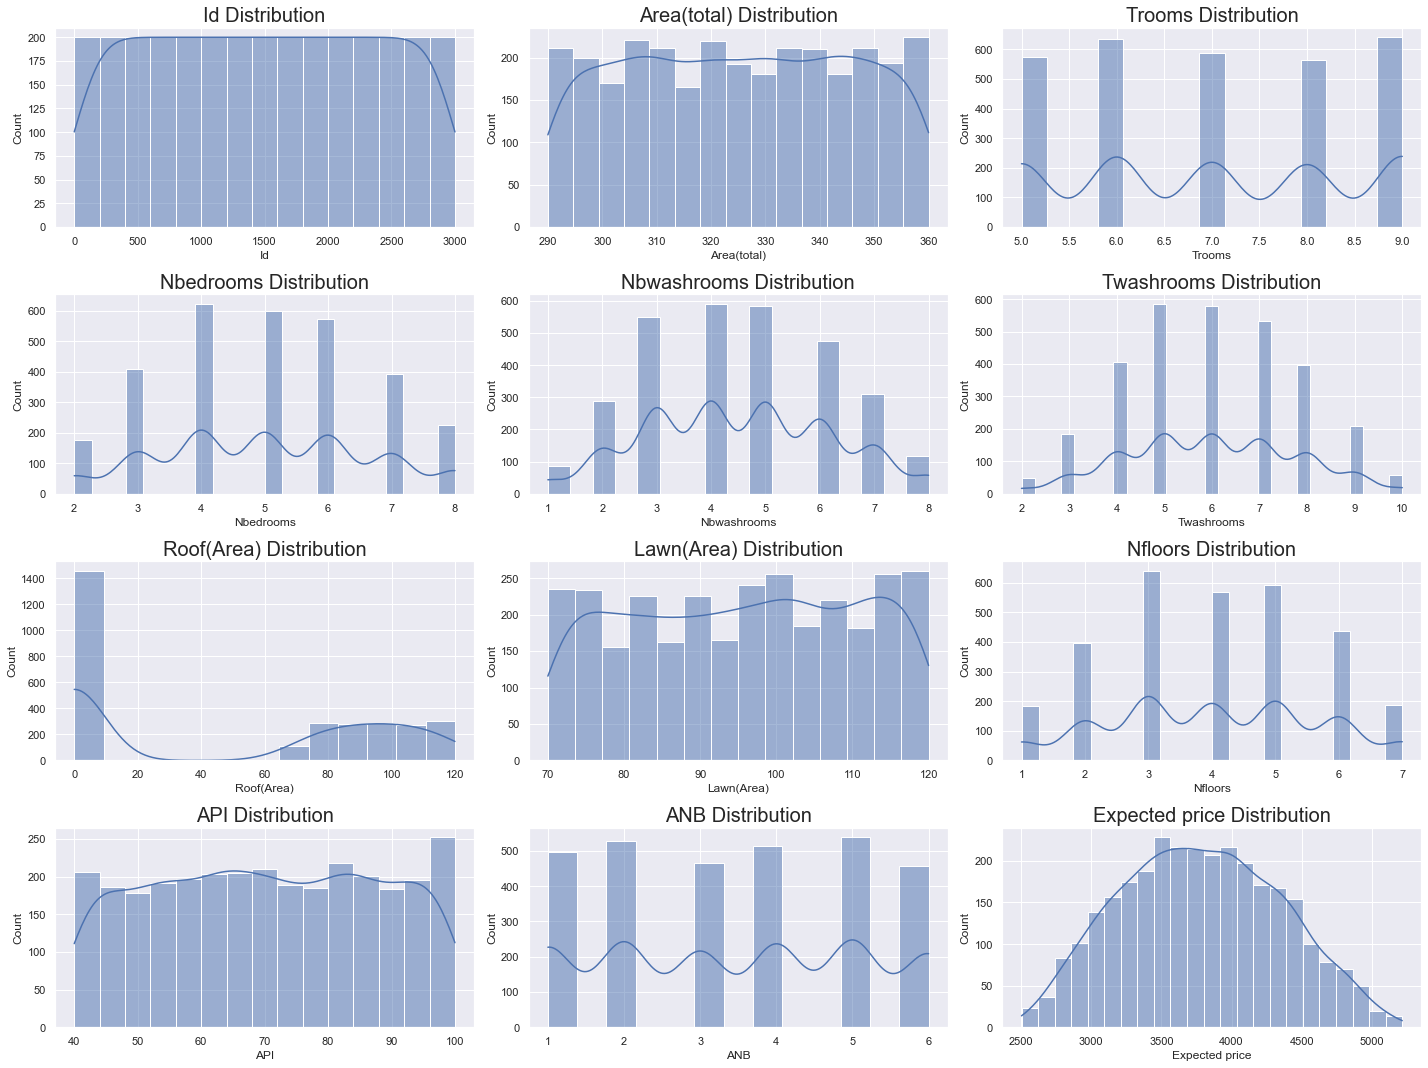

In [12]:
plt.figure(figsize = (20,15))
z=1
for col in a.columns:
    plt.subplot(4,3,z)
    sb.histplot(x = df[col],kde=True)
    plt.title(f'{col} Distribution',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretation :
* The above plots shows the distribution of all numerical columns.
* Most the numerical columns are normally distibuted.
* Expected price column has normally distributed.
* Most of the columns has the data as classification or the count ,because of that we are not getting the proper distribution.

**Boxplot for all the numerical columns**

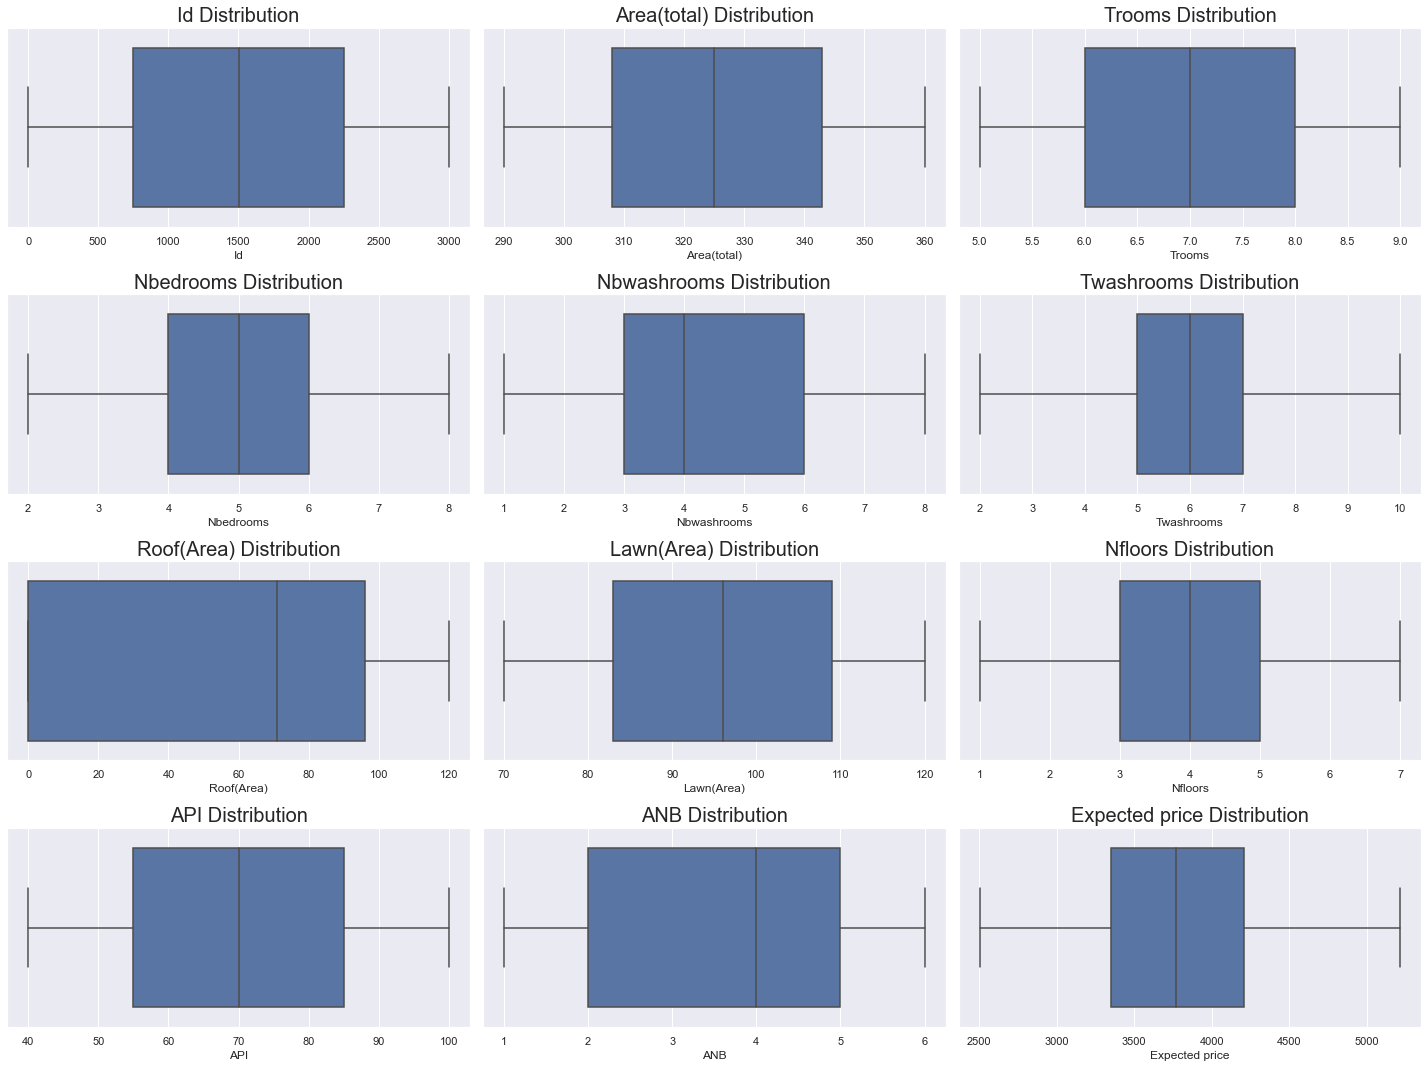

In [13]:
plt.figure(figsize = (20,15))
z=1
for col in a.columns:
    plt.subplot(4,3,z)
    sb.boxplot(x = df[col])
    plt.title(f'{col} Distribution',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretation :
* By using the boxplot we can able to find the outiers
* By seeing the all the boxplots we cannot find any outliers in the data.
* We can able to see the spread of the data.
* Roof(Area) has more spread than compared to all numerical columns.


**Catrgorical columns**

In [14]:
b.columns

Index(['roof', 'Grade'], dtype='object')

**Roof**

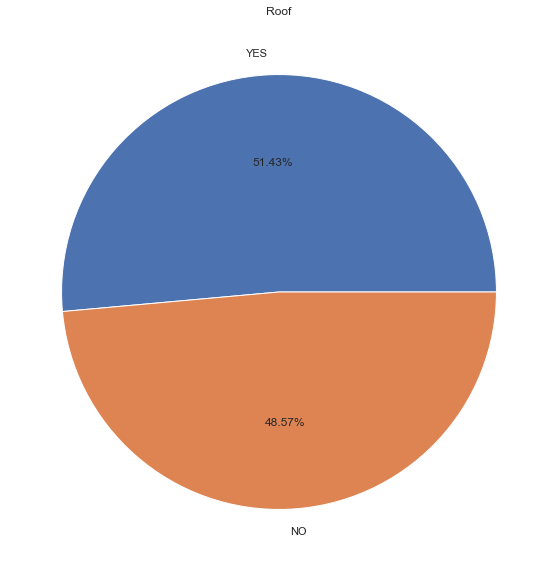

In [15]:
roof = b.roof.value_counts()
plt.figure(figsize=(20,10))
plt.pie(roof.values,labels=roof.index,autopct='%.2f%%')
plt.title('Roof')
plt.show()

##### Interpretation :
* From the above pie chart we can see that the most of the house has roof .
* But the difference between the house with roof and without roof are not that much big.
* House with roof and without roof are almost equal

**Grade**

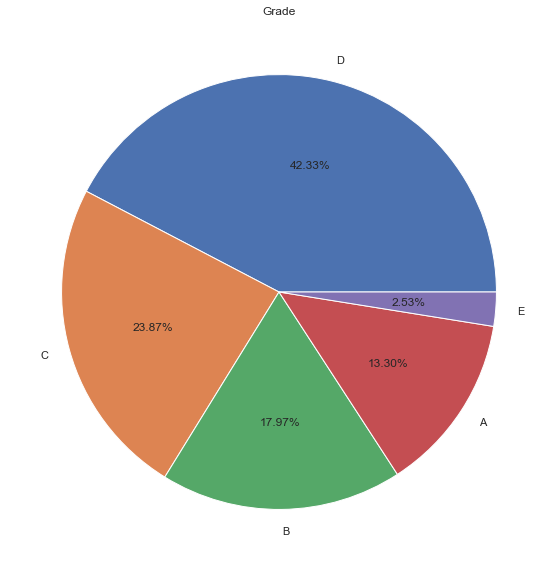

In [16]:
grade = b.Grade.value_counts()
fig,ax = plt.subplots(1,1,figsize = (20,10))
plt.pie(grade.values,labels=grade.index,autopct='%.2f%%')
plt.title('Grade')
plt.show()

##### Interpretation :
* From the above plot we can see the percentange of houses with different grades.
* The count of houses we the grade D has the more number of houses than copared to other houses.
* The secound highest is the houses with the grade C.

**Roof vs Grade**

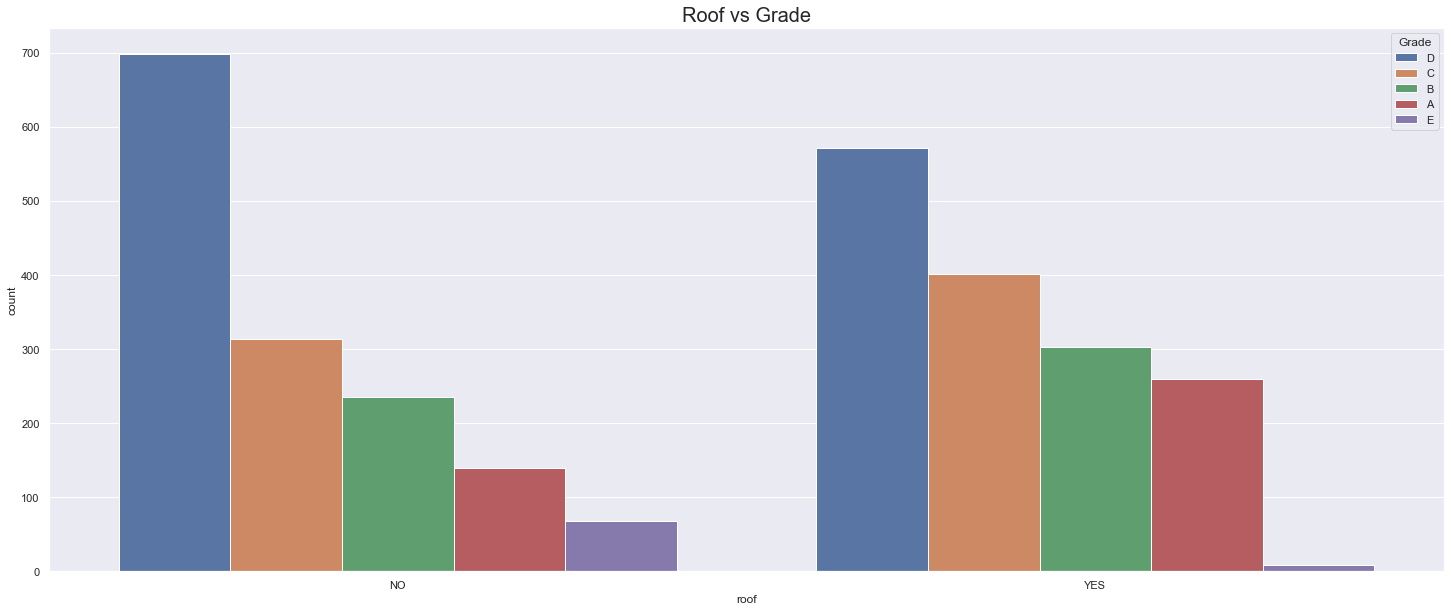

In [17]:
plt.figure(figsize=(25,10))
sb.countplot(x='roof',hue='Grade',data=df)
plt.title('Roof vs Grade',fontsize=20)
plt.show()

##### Interpretation :
* The houses with the grade D has the more number of houses in the category roof.
* The houses with grade E has the very less houses with roof .
* Second highest with and without houses are in the grade C.

**Grade vs Expected Price**

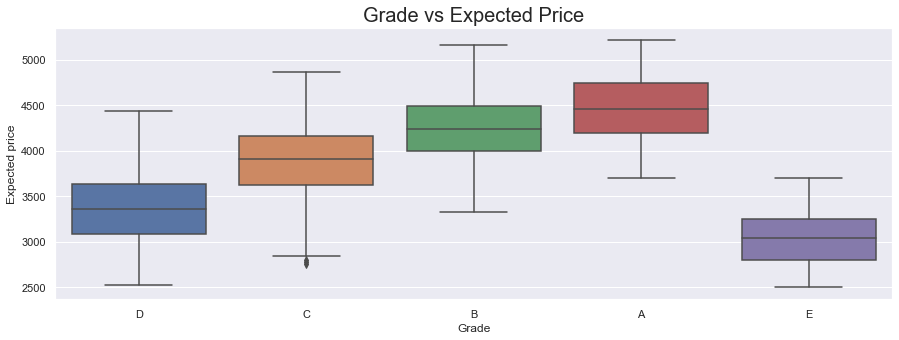

In [18]:
plt.figure(figsize=(15,5))
sb.boxplot(x=df['Grade'],y=df['Expected price'])
plt.title('Grade vs Expected Price',fontsize=20)
plt.show()

##### Interpretation :
* From the above boxplot we can see that the spread of the expected price and their rage.
* The houses with the range a has the high Expected price than compared to others.
* The second highest is houses with Grade B.
* The houses with the Grade E has the very less expected price and their is also very low than compared to other grade houses.

**Grade vs Area**

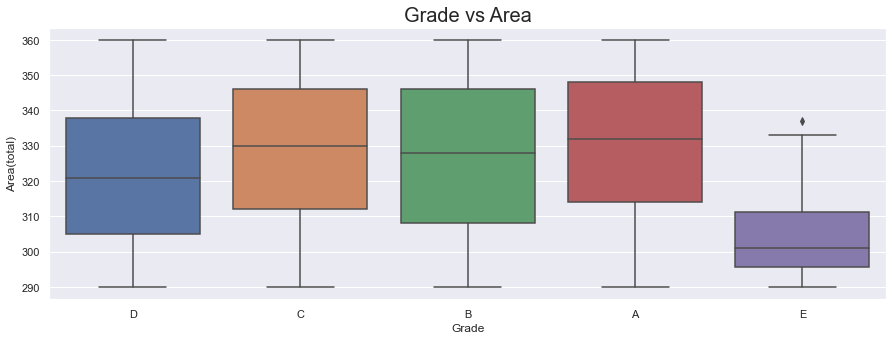

In [19]:
plt.figure(figsize=(15,5))
sb.boxplot(x=df['Grade'],y=df['Area(total)'])
plt.title('Grade vs Area',fontsize=20)
plt.show()

##### Interpretation :
* The houses in the Grade B has the more spred than compared to others ie) Grade B houses has the houses with different area size.
* The houses with the grade E has the very less area.
* But the range of all grade are almost equal except E.

**Nfloors vs Grade**

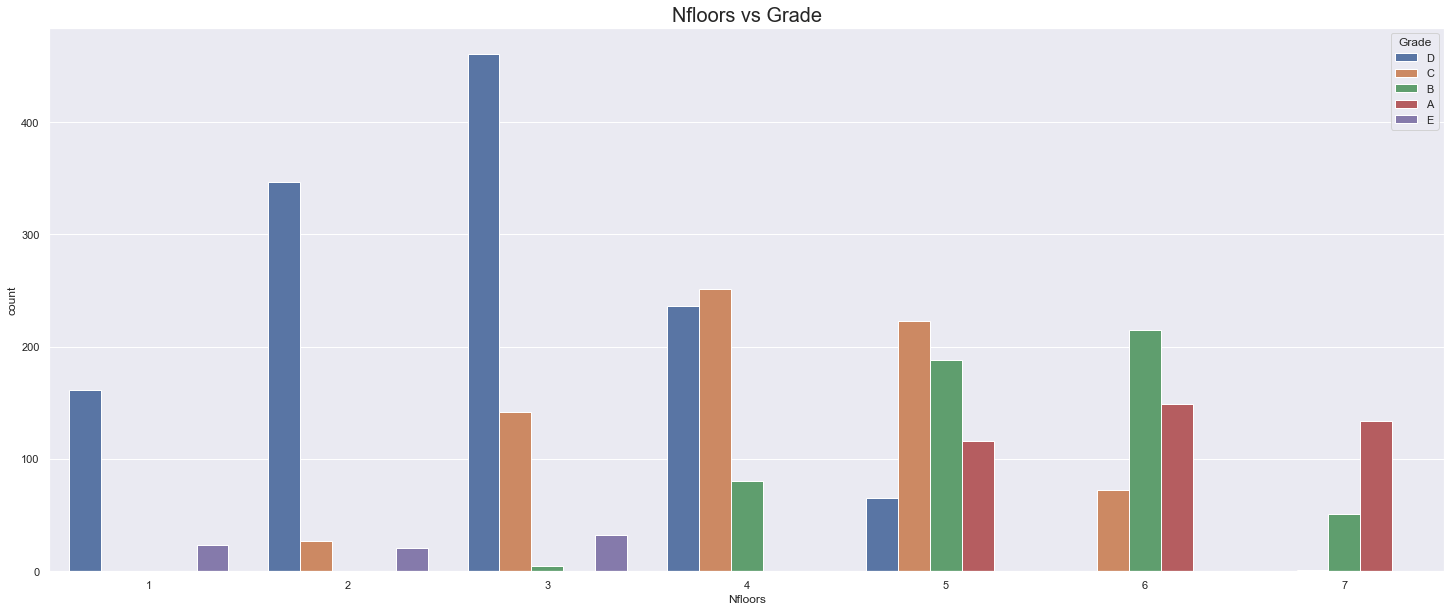

In [20]:
plt.figure(figsize=(25,10))
sb.countplot(x='Nfloors',hue='Grade',data=df)
plt.title('Nfloors vs Grade',fontsize=20)
plt.show()

##### Interpretation :
* Grade D has the more number of houses with 1,2,3 floors.
* Grade E has very low house with 1,2,3 floors and has no houses with 4,5,6,7.
* Grade C has house with all kinds of floor category.
* Grade B has the highest number of with 5 floors.
* Grade A the houses only in the floor category 5,6,7.

**Rooms vs Grade**

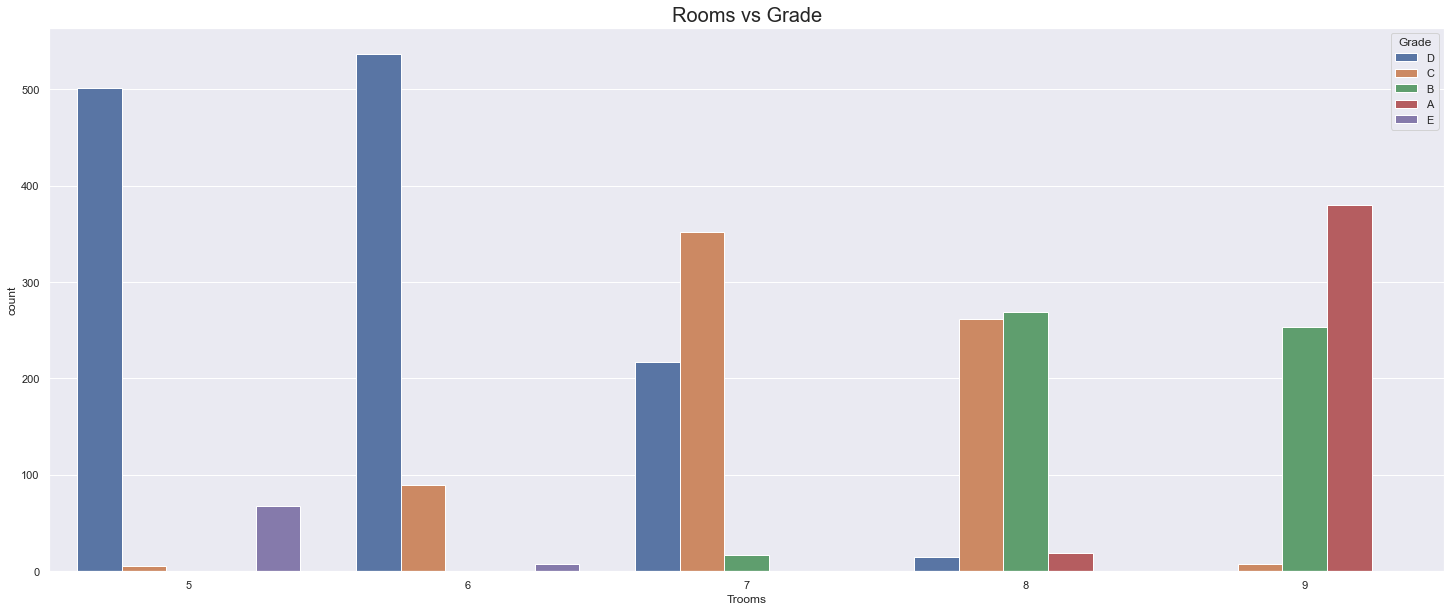

In [21]:
plt.figure(figsize=(25,10))
sb.countplot(x='Trooms',hue='Grade',data=df)
plt.title('Rooms vs Grade',fontsize=20)
plt.show()

##### Interpretation :
* Grade A has the most number of houses with 9 rooms and donts have any house with 5,6,7 rooms.
* Grade B has the houses with the 7,8,9 room category.
* Grade D has the most number of houses with 5,6 room category.

**Bedrooms vs Grade**

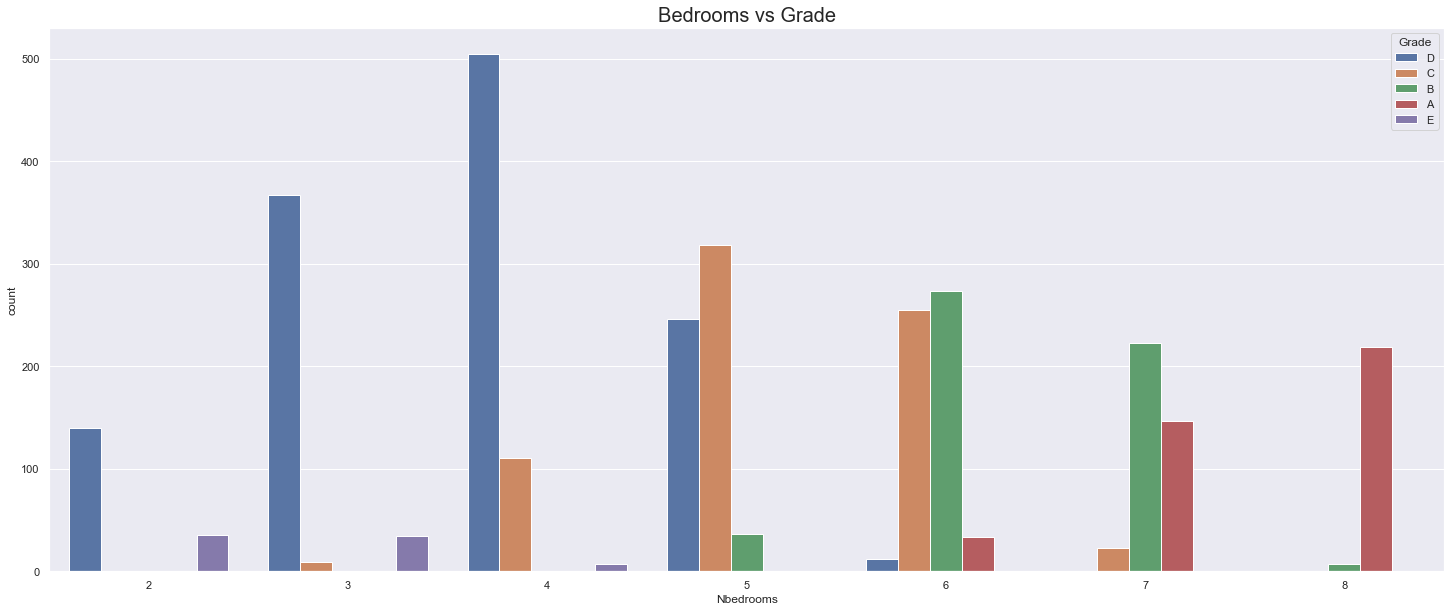

In [22]:
plt.figure(figsize=(25,10))
sb.countplot(x='Nbedrooms',hue='Grade',data=df)
plt.title('Bedrooms vs Grade',fontsize=20)
plt.show()

##### Interpretation :
* Grade A has the most number of houses with 8 bedrooms and donts have any house with 2,3,4,5 rooms.
* Grade B has the houses with the 5,6,7 bedrooms category.
* Grade D has the most number of houses with 2,3,4 bedroom category.
* Grade E has the houses only in the bedroom category 2,3,4. 

**Washrooms vs Grade**

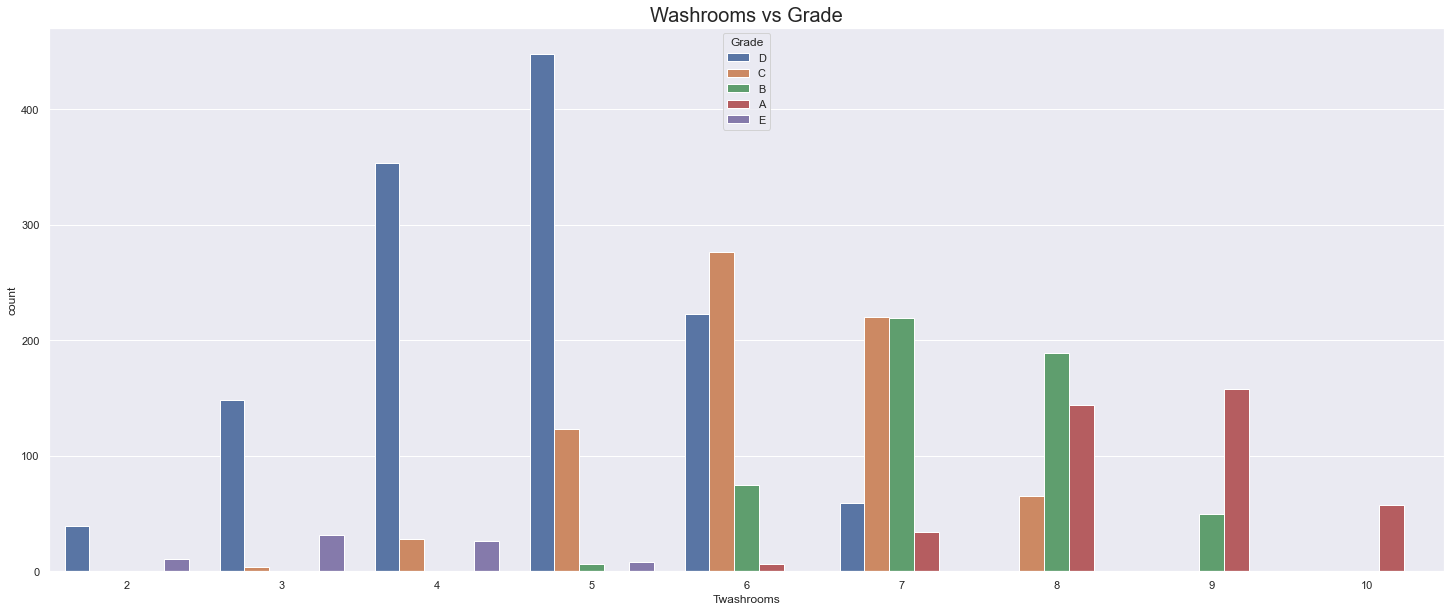

In [23]:
plt.figure(figsize=(25,10))
sb.countplot(x='Twashrooms',hue='Grade',data=df)
plt.title('Washrooms vs Grade',fontsize=20)
plt.show()

**Grade vs Lawn area**

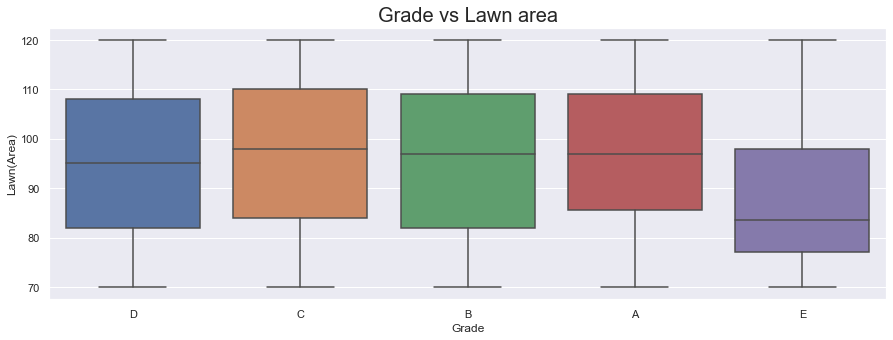

In [24]:
plt.figure(figsize=(15,5))
sb.boxplot(x=df['Grade'],y=df['Lawn(Area)'])
plt.title('Grade vs Lawn area',fontsize=20)
plt.show()

##### Interpretation :
* Almost all the houses in the different grade having same spread in the lawn area.
* Grade E has the less spread and their area size is very less.

**Area vs Expected price**

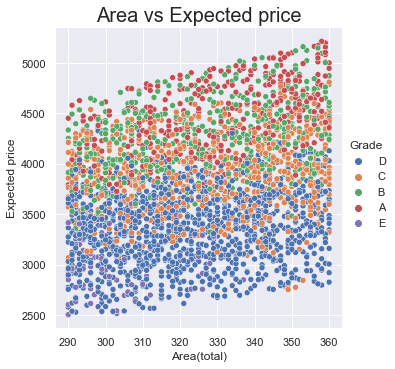

In [25]:
sb.relplot(x = df['Area(total)'],y=df['Expected price'],hue=df['Grade'])
plt.title('Area vs Expected price',fontsize=20)
plt.show()

##### Interpretation :
* Grade D and E has the very less price by comparing with the area. It has the houses with more area and less price.
* Their price range is from 2500 to 3500.

**Lawn vs Expected price**

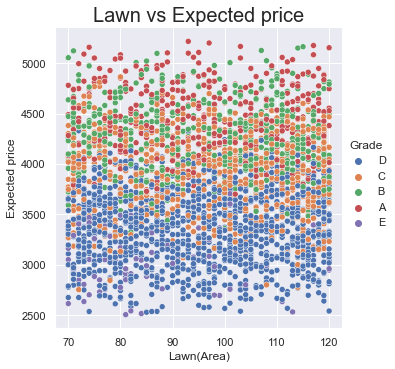

In [26]:
sb.relplot(x = df['Lawn(Area)'],y=df['Expected price'],hue=df['Grade'])
plt.title('Lawn vs Expected price',fontsize=20)
plt.show()

##### Interpretation :
* Grade D and E has the very less price by comparing with the lawn area. It has the houses with more lawn area and less price.
* Their price range is from 2500 to 3500.

### Data preprocessing

In [27]:
# copy
df_1=df.copy()

**Object to category**

In [28]:
# converting object into categorical
object = list(b.columns)
for c in object:
    df_1[c] = df_1[c].astype('category')
df_1.dtypes

Id                   int64
Area(total)          int64
Trooms               int64
Nbedrooms            int64
Nbwashrooms          int64
Twashrooms           int64
roof              category
Roof(Area)           int64
Lawn(Area)           int64
Nfloors              int64
API                  int64
ANB                  int64
Expected price       int64
Grade             category
dtype: object

**Label Encoading**

In [29]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
for c in object:
    df_1[c]= label_encoder.fit_transform(df_1[c])
    
df_1.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3


**Feature selection**

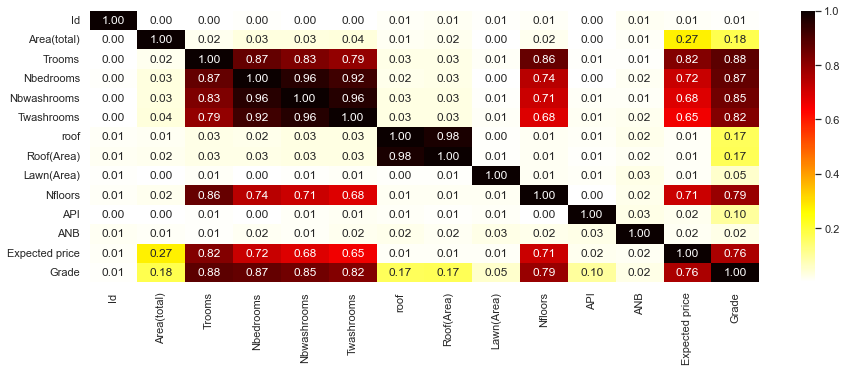

In [134]:
correlation = abs(df_1.corr())
plt.figure(figsize=(15,5))
sb.heatmap(correlation,annot=True,fmt='.2f',cmap='hot_r')
plt.show()

In [136]:
correlation['Grade'].sort_values(ascending=False)

Grade             1.000000
Trooms            0.875145
Nbedrooms         0.865389
Nbwashrooms       0.847319
Twashrooms        0.819280
Nfloors           0.787623
Expected price    0.760820
Area(total)       0.177332
Roof(Area)        0.170259
roof              0.166635
API               0.099000
Lawn(Area)        0.051200
ANB               0.024025
Id                0.006074
Name: Grade, dtype: float64

In [32]:
df_1.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

**Selecting the required features**

In [33]:
data = df_1[['Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms','Nfloors','Expected price','Grade','Area(total)','Roof(Area)']]
data

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Grade,Area(total),Roof(Area)
0,6,5,4,6,2,3481,3,339,0
1,5,4,3,4,3,3510,3,358,71
2,7,5,4,5,5,3748,2,324,101
3,6,4,3,5,2,3134,3,330,101
4,7,4,4,5,3,3843,3,320,0
...,...,...,...,...,...,...,...,...,...
2995,9,6,5,7,5,4246,1,341,95
2996,9,8,7,8,7,3753,0,292,116
2997,7,4,3,5,5,3607,3,328,0
2998,9,7,7,8,7,4198,1,293,0


**Dependent and Independent**

In [34]:
x = data.drop(columns = 'Grade')   # Independent
y = data['Grade']                  # target

### Hold out

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=23)  # Taking 75:25 ratio for train and test
print(f"Shape of X Traindata = {x_train.shape},X Testdata = {x_test.shape}")
print(f"Shape of Y Traindata = {y_train.shape},Y Testdata = {y_test.shape}")

Shape of X Traindata = (2250, 8),X Testdata = (750, 8)
Shape of Y Traindata = (2250,),Y Testdata = (750,)


**Scaling the data**

In [36]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_df = x.select_dtypes(include=numerics)
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(x.to_numpy()),columns=new_df.columns)
    return df_scaled

In [37]:
scale = 'minmax' #normalize
x=feature_scale(scale)
x

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Area(total),Roof(Area)
0,0.25,0.500000,0.428571,0.500,0.166667,0.360251,0.700000,0.000000
1,0.00,0.333333,0.285714,0.250,0.333333,0.370944,0.971429,0.591667
2,0.50,0.500000,0.428571,0.375,0.666667,0.458702,0.485714,0.841667
3,0.25,0.333333,0.285714,0.375,0.166667,0.232301,0.571429,0.841667
4,0.50,0.333333,0.428571,0.375,0.333333,0.493732,0.428571,0.000000
...,...,...,...,...,...,...,...,...
2995,1.00,0.666667,0.571429,0.625,0.666667,0.642330,0.728571,0.791667
2996,1.00,1.000000,0.857143,0.750,1.000000,0.460546,0.028571,0.966667
2997,0.50,0.333333,0.285714,0.375,0.666667,0.406711,0.542857,0.000000
2998,1.00,0.833333,0.857143,0.750,1.000000,0.624631,0.042857,0.000000


### Classifier models

**1.Logistic regression**

In [38]:
logreg = LogisticRegression() # building the model
log_model = logreg.fit(x_train, y_train) # fitting the model

In [39]:
# predicting the test data
log_pred = log_model.predict(x_test)
log_pred

array([3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 1, 0, 2, 3, 0, 3,
       3, 0, 2, 1, 2, 1, 3, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3,
       3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 0, 2, 2, 0, 3, 3, 3, 3, 1, 3, 0, 3,
       3, 3, 0, 3, 3, 2, 3, 1, 3, 1, 3, 0, 3, 3, 1, 2, 2, 3, 3, 3, 2, 3,
       3, 2, 1, 1, 0, 2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 2,
       3, 1, 2, 3, 1, 0, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 0, 3,
       3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 0, 2, 3, 2, 3, 3, 1, 3, 3, 0, 1, 2,
       3, 0, 2, 1, 3, 3, 3, 0, 2, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 1, 2,
       3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 2, 3, 3, 1, 3, 2, 0,
       3, 0, 3, 2, 3, 1, 2, 2, 3, 0, 1, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 1,
       3, 3, 0, 2, 2, 3, 3, 0, 2, 1, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 0, 3,
       2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 2, 0,
       3, 2, 1, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3,

**2.Naive Bayes**

In [40]:
# Fitting Naive Bayes to the Training set
naivebayes = GaussianNB()
naive_bayes_model=naivebayes.fit(x_train, y_train) 

In [41]:
naivebayes_pred=naive_bayes_model.predict(x_test)
naivebayes_pred

array([2, 2, 1, 3, 3, 0, 3, 1, 1, 2, 1, 3, 3, 1, 0, 3, 2, 1, 3, 3, 0, 3,
       3, 0, 3, 2, 3, 2, 4, 1, 2, 2, 3, 3, 4, 2, 3, 3, 3, 0, 1, 1, 2, 2,
       3, 3, 2, 2, 4, 0, 2, 3, 2, 3, 0, 3, 1, 0, 3, 3, 2, 2, 1, 1, 1, 3,
       3, 3, 0, 3, 3, 2, 2, 1, 3, 0, 3, 0, 4, 3, 1, 2, 0, 3, 3, 3, 0, 3,
       2, 1, 0, 2, 0, 1, 1, 2, 4, 0, 3, 3, 3, 3, 3, 2, 1, 0, 0, 3, 3, 2,
       3, 0, 1, 3, 2, 0, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 2, 3, 1, 3, 0, 2,
       2, 1, 2, 0, 3, 0, 2, 3, 3, 4, 2, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 1,
       4, 1, 0, 2, 2, 3, 3, 2, 1, 3, 1, 0, 3, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 3, 3, 1, 1, 2, 1, 1, 2, 1, 2,
       3, 3, 2, 2, 3, 3, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 4, 3, 0, 3, 2, 0,
       3, 0, 3, 1, 2, 1, 2, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1,
       3, 4, 0, 3, 1, 3, 2, 1, 2, 0, 2, 3, 3, 3, 3, 1, 1, 4, 3, 2, 0, 4,
       2, 3, 1, 2, 4, 4, 2, 3, 2, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 3, 1, 1,
       4, 2, 1, 3, 3, 2, 0, 3, 0, 1, 0, 4, 3, 3, 3,

### *Hyperparameter tuning for Decision Tree classifier,Random Forest classifier(Bagging),Adaboost classifier*

decision tree classifier = max_depth,min_samples_leaf,max_leaf_nodes

random forest = max_depth,min_samples_leaf,max_leaf_nodes,n_estimators,max_sample,min_sample_split

ada boost = n_estimators


**Defining a function**

In [42]:
def hyper_parameter(model_name):
    depth =[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
    sample_leaf = [5,10,15,20,25,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200]
    estimators = [1,3,5,7,8,9,10,11,13,15,17,19,21,23,27,29,31,33,35,50,100,200]
    score_train=[]
    score_test=[]
    f1_score = []
    accuracy_train = []
    accuracy_test = []
    precision = []
    recall =[]
    minimum_sample_leaf =[]
    depth_list = []
    number_of_estimators = []

    if model_name == 'decisiontreeclassifier':
        for i in depth:
            for j in sample_leaf:
                decision_tree_model = DecisionTreeClassifier(max_depth=i,min_samples_leaf=j).fit(x_train,y_train)
                train_score = decision_tree_model.score(x_train,y_train) 
                test_score = decision_tree_model.score(x_test,y_test)
                decision_tree_pred = decision_tree_model.predict(x_test)
                decision_tree_f1 = metrics.f1_score(y_test,decision_tree_pred,average = 'weighted')
                decision_tree_precision = precision_score(y_test,decision_tree_pred,average = 'weighted')  
                decision_tree_recall = recall_score(y_test,decision_tree_pred,average = 'weighted')
                
                depth_list.append(i)
                minimum_sample_leaf.append(j)
                f1_score.append(decision_tree_f1)
                precision.append(decision_tree_precision)
                accuracy_train.append(train_score*100)
                accuracy_test.append(test_score*100)
                recall.append(decision_tree_recall)  

        comparision = pd.DataFrame({'Depth':depth_list,'Minimum leaf Sample':minimum_sample_leaf,'Train Accuracy/score':accuracy_train,'Test Accuracy/score':accuracy_test,'Precision Score':precision,'Recall Score':recall,'F1_score':f1_score})
        return(comparision)  

    elif model_name=='randomforestclassifier':
        params = {'max_depth': [1,2,4,6,7,9,10,11,13,23],'min_samples_leaf': [1,3,5,7,10,15,35,50],'n_estimators': [1,3,5,7,9,11,13,15]}  
        random_forest_model=RandomForestClassifier(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(estimator=random_forest_model,param_grid=params,cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")          
        grid_search_fit=grid_search.fit(x_train, y_train)
        grid_search_score=grid_search.best_score_
        random_forest_best=grid_search.best_estimator_
                  
        return(grid_search_score,random_forest_best)  
    
    elif model_name == 'adaboostclassifier':
        for i in estimators:
            adaboost_model = AdaBoostClassifier(n_estimators=i).fit(x_train,y_train)
            train_score = adaboost_model.score(x_train,y_train) 
            test_score = adaboost_model.score(x_test,y_test)
            adaboost_pred = adaboost_model.predict(x_test)
            adaboost_f1 = metrics.f1_score(y_test,adaboost_pred,average = 'weighted')
            adaboost_precision = precision_score(y_test,adaboost_pred,average = 'weighted')  
            adaboost_recall = recall_score(y_test,adaboost_pred,average = 'weighted')
            
            number_of_estimators.append(i) 
            f1_score.append(adaboost_f1)
            precision.append(adaboost_precision)
            accuracy_train.append(train_score*100)
            accuracy_test.append(test_score*100)
            recall.append(adaboost_recall)        
            
        comparision = pd.DataFrame({'Estimators':number_of_estimators,'Train Accuracy/score':accuracy_train,'Test Accuracy/score':accuracy_test,'Precision Score':precision,'Recall Score':recall,'F1_score':f1_score})
        return(comparision)  
    

**3.Decision Tree**

In [43]:
model_name='decisiontreeclassifier'
decision_test_best=hyper_parameter(model_name)
decision_test_best.sort_values('Test Accuracy/score',ascending=False)

,Depth,Minimum leaf Sample,Train Accuracy/score,Test Accuracy/score,Precision Score,Recall Score,F1_score
102,11,15,87.466667,86.400000,0.864939,0.864000,0.863058
342,35,15,87.466667,86.400000,0.864939,0.864000,0.863058
122,13,15,87.466667,86.400000,0.864939,0.864000,0.863058
82,9,15,87.466667,86.400000,0.864939,0.864000,0.863058
322,33,15,87.466667,86.400000,0.864939,0.864000,0.863058
...,...,...,...,...,...,...,...
17,1,95,59.600000,58.133333,0.366001,0.581333,0.444406
18,1,100,59.600000,58.133333,0.366001,0.581333,0.444406
19,1,200,59.600000,58.133333,0.366001,0.581333,0.444406
1,1,10,59.600000,58.133333,0.366001,0.581333,0.444406


At Depth=11 and Minimum leaf Sample=15 we are getting good results.

In [47]:
decision_tree_model = DecisionTreeClassifier(max_depth = 11,min_samples_leaf=15).fit(x_train,y_train)

In [48]:
decision_tree_pred = decision_tree_model.predict(x_test)
decision_tree_pred

array([3, 2, 1, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 1, 0, 2, 2, 0, 3, 3, 0, 3,
       3, 0, 3, 2, 3, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 0, 2, 1, 2, 3,
       3, 3, 2, 2, 3, 0, 2, 2, 2, 3, 0, 3, 1, 0, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 3, 3, 2, 2, 2, 3, 0, 3, 0, 4, 3, 2, 1, 0, 3, 3, 3, 0, 3,
       2, 1, 0, 2, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 0, 0, 3, 3, 3,
       3, 0, 0, 3, 2, 0, 3, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 0, 2,
       2, 1, 2, 0, 3, 0, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 2, 2, 1, 1, 0,
       4, 1, 0, 2, 2, 3, 3, 2, 1, 3, 1, 0, 3, 3, 1, 2, 1, 1, 2, 3, 3, 3,
       3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 3, 1, 2,
       2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 0, 3, 3, 0,
       3, 0, 3, 1, 2, 2, 1, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1,
       3, 4, 0, 3, 1, 3, 2, 1, 2, 0, 2, 3, 3, 3, 3, 1, 1, 4, 3, 2, 0, 3,
       2, 3, 0, 2, 4, 3, 2, 3, 2, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1,
       4, 2, 2, 2, 3, 2, 0, 3, 0, 1, 0, 3, 3, 3, 2,

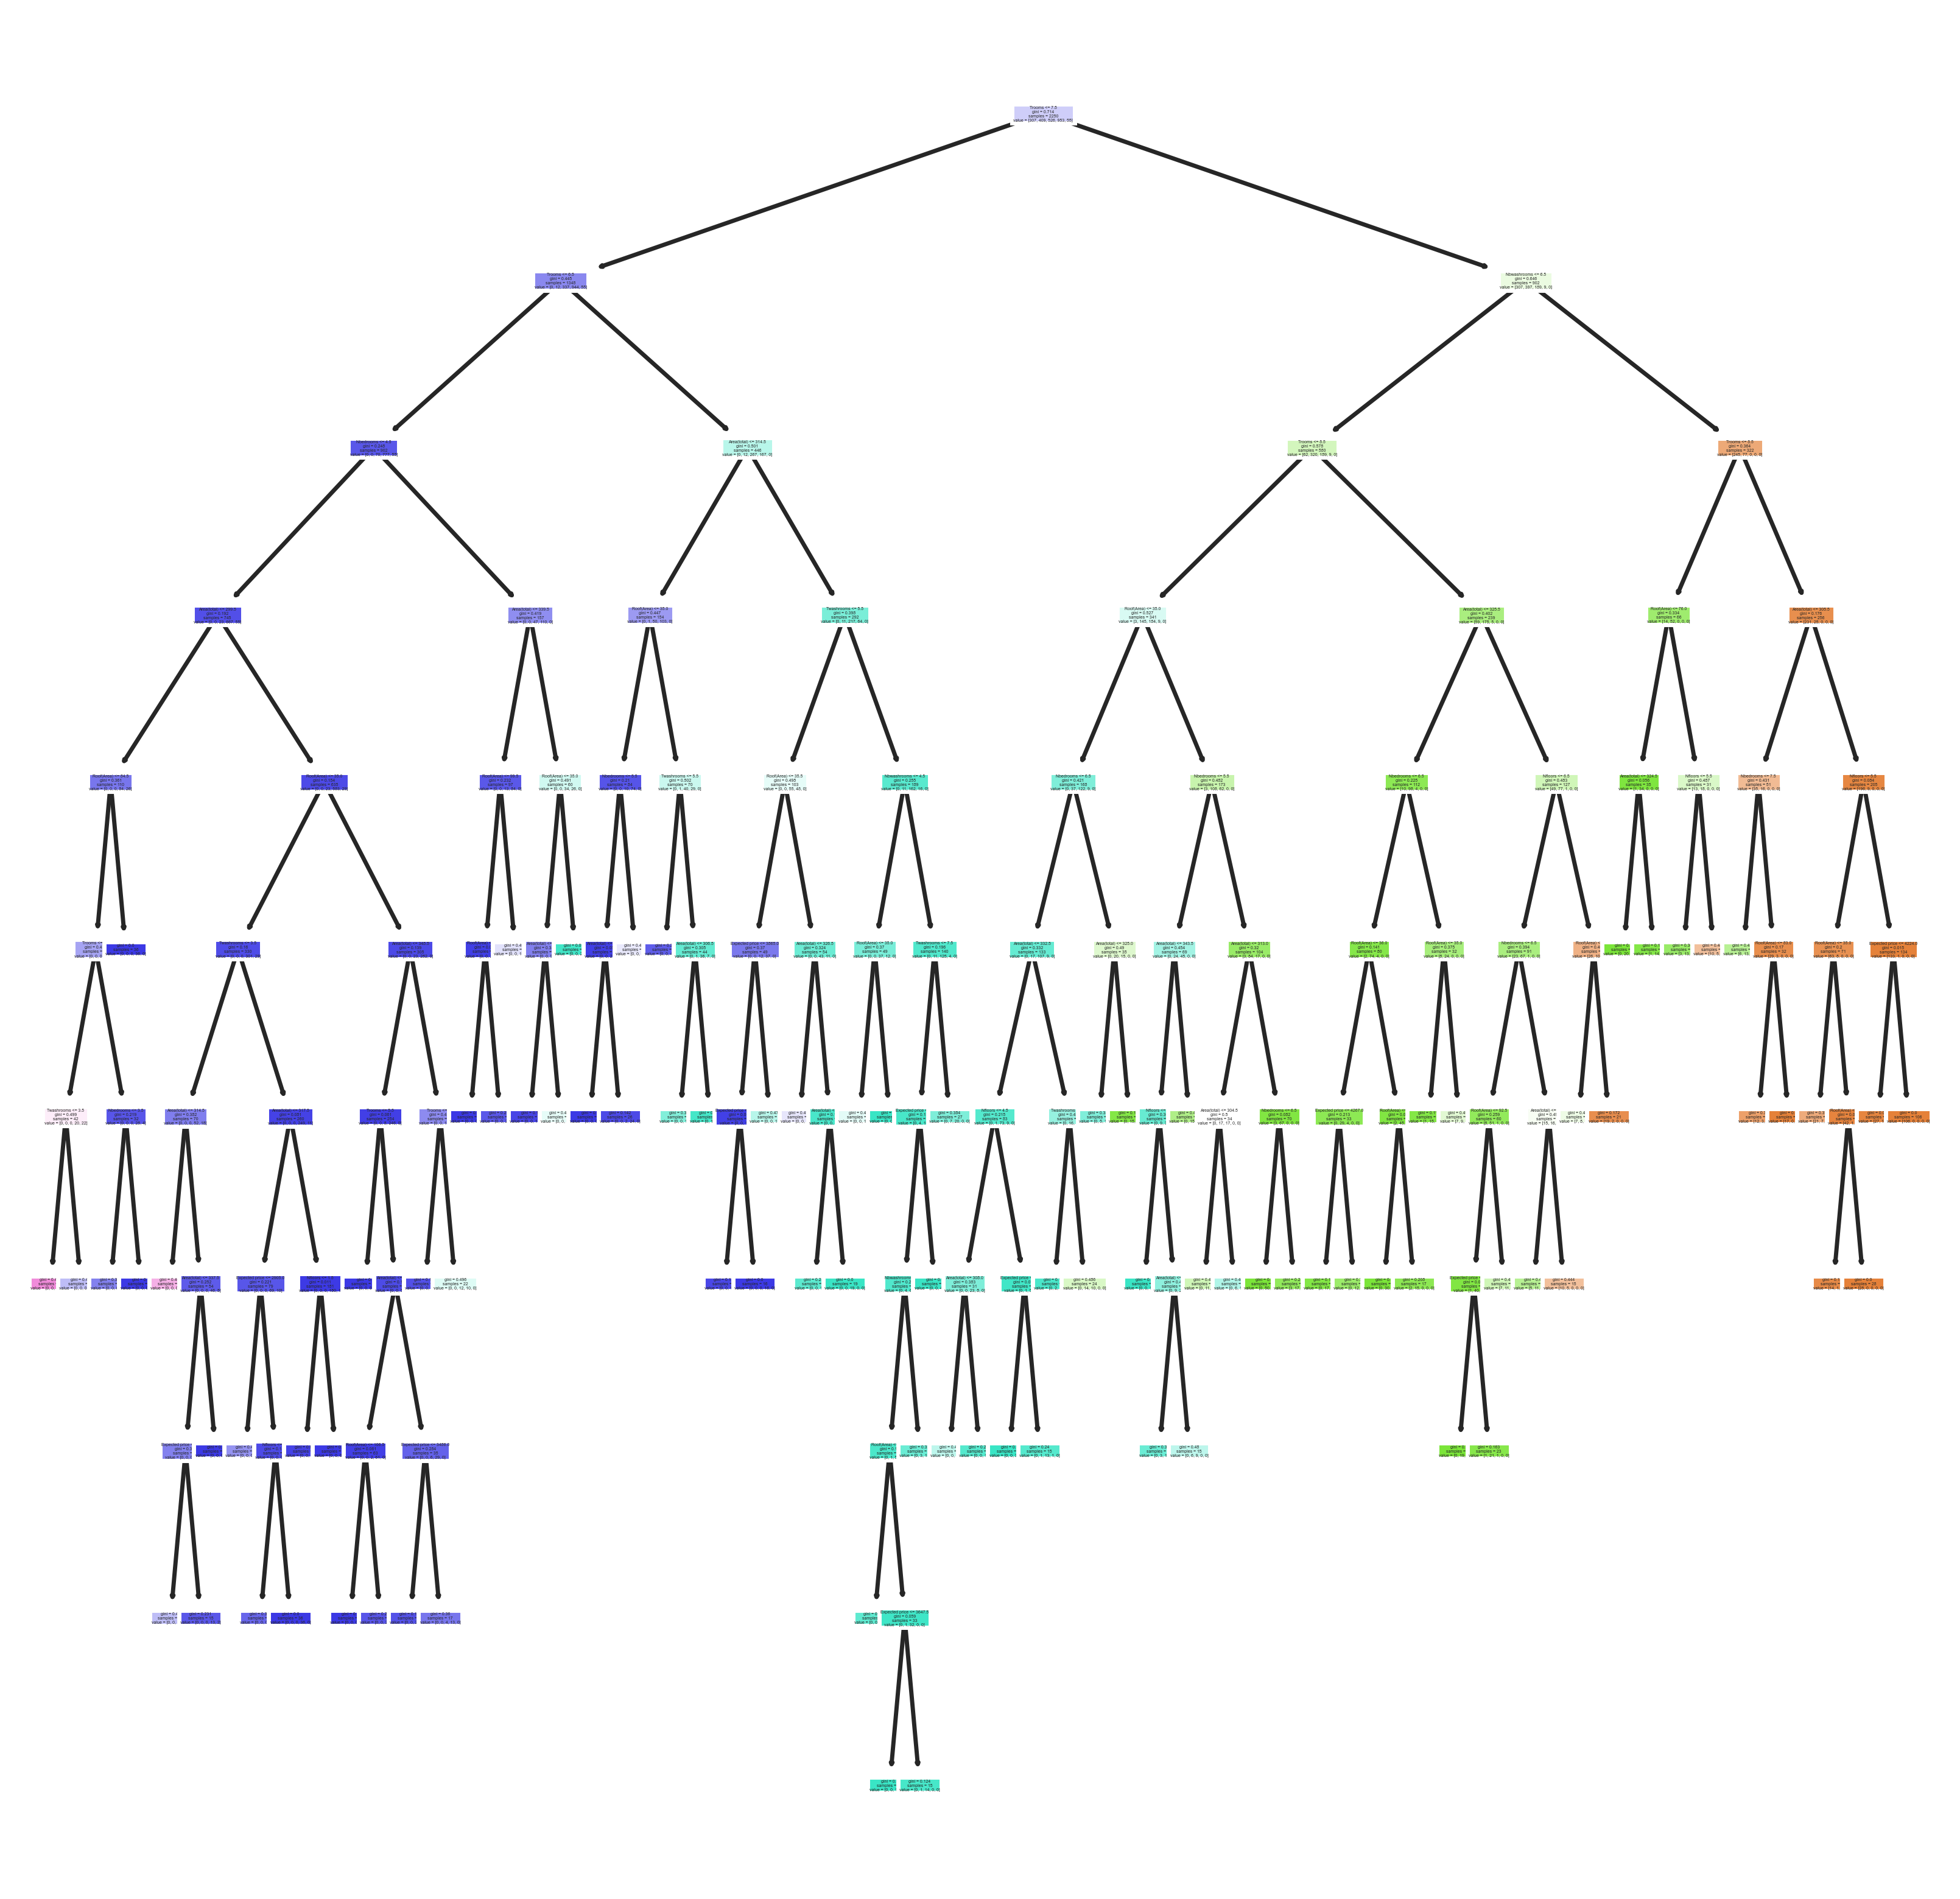

In [46]:
fig, ax = plt.subplots(1,1,figsize = (8,8), dpi=500)

plot_tree(decision_tree_model,
           feature_names = x.columns, 
           filled = True);

fig.savefig('Decision_Tree.png')

**4.Random forest classifier**

In [49]:
model_name='randomforestclassifier'
rf_score,rf_best=hyper_parameter(model_name)

Fitting 4 folds for each of 640 candidates, totalling 2560 fits


In [50]:
rf_score

0.8657760914774056

In [51]:
rf_best

RandomForestClassifier(max_depth=23, min_samples_leaf=3, n_estimators=13,
                       n_jobs=-1, random_state=42)

By using grid search we are getting good results at max_depth=23, min_samples_leaf=3, n_estimators=13,n_jobs=-1, random_state=42 .

In [52]:
random_forest_model = RandomForestClassifier(max_depth=23, min_samples_leaf=3, n_estimators=13,n_jobs=-1, random_state=42).fit(x_train,y_train)

In [53]:
random_forest_pred = random_forest_model.predict(x_test)
random_forest_pred

array([3, 2, 1, 3, 3, 0, 3, 0, 1, 2, 1, 3, 2, 1, 0, 2, 2, 1, 3, 3, 0, 3,
       3, 0, 3, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 3, 3, 3, 0, 2, 1, 2, 3,
       3, 3, 2, 2, 3, 0, 3, 2, 3, 3, 0, 3, 1, 0, 3, 2, 3, 3, 2, 1, 1, 3,
       3, 3, 0, 3, 3, 2, 3, 2, 3, 0, 2, 0, 4, 3, 2, 2, 0, 3, 3, 3, 0, 3,
       2, 1, 0, 2, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 0, 3, 3, 3,
       3, 0, 1, 3, 2, 0, 3, 1, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 0, 2,
       2, 1, 2, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 1,
       4, 1, 0, 2, 3, 3, 3, 2, 1, 3, 0, 0, 3, 3, 1, 2, 1, 1, 2, 3, 3, 3,
       3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 1, 2,
       3, 3, 2, 1, 3, 3, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 1, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1,
       3, 3, 0, 3, 1, 3, 2, 1, 2, 0, 2, 3, 3, 3, 3, 1, 1, 4, 3, 2, 0, 3,
       2, 3, 1, 2, 4, 3, 2, 3, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 3, 3, 1, 1,
       4, 2, 2, 3, 3, 2, 0, 3, 0, 1, 0, 3, 3, 3, 2,

**5.Adaboost Classifier**

In [54]:
model_name='adaboostclassifier'
adaboost_best=hyper_parameter(model_name)
adaboost_best.sort_values('Test Accuracy/score',ascending=False)

,Estimators,Train Accuracy/score,Test Accuracy/score,Precision Score,Recall Score,F1_score
1,3,67.600000,65.866667,0.591781,0.658667,0.591244
11,19,58.933333,58.400000,0.592756,0.584000,0.553693
20,100,58.933333,58.400000,0.592756,0.584000,0.553693
19,50,58.933333,58.400000,0.592756,0.584000,0.553693
18,35,58.933333,58.400000,0.592756,0.584000,0.553693
17,33,58.933333,58.400000,0.592756,0.584000,0.553693
16,31,58.933333,58.400000,0.592756,0.584000,0.553693
15,29,58.933333,58.400000,0.592756,0.584000,0.553693
14,27,58.933333,58.400000,0.592756,0.584000,0.553693
13,23,58.933333,58.400000,0.592756,0.584000,0.553693


At Estimators=3 we are getting good results.

In [55]:
adaboost_model = AdaBoostClassifier(n_estimators=3).fit(x_train,y_train)

In [56]:
adaboost_model_pred = adaboost_model.predict(x_test)
adaboost_model_pred

array([3, 2, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 2, 1, 3, 3, 1, 3,
       3, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3,
       2, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 3,
       3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 2,
       2, 1, 3, 1, 3, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 1,
       3, 1, 1, 2, 3, 3, 3, 2, 1, 3, 1, 1, 3, 3, 1, 2, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 2,
       3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 1, 3, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 1, 3, 3, 1, 2, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 1, 3,
       3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3, 1, 1,
       3, 2, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3,

**6.Stacking**

In [57]:
def get_stacking():
    base = []
    base.append((('logistic_regression', log_model)))
    base.append((('Random_forest', random_forest_model)))
    base.append((('Decision_tree', decision_tree_model)))
    base.append((('Naive_bayes', naive_bayes_model)))
    # define meta model
    meta = log_model
    # define the stacking ensemble
    model_sc = StackingClassifier(estimators=base, final_estimator=meta, cv=4).fit(x_train,y_train)  
    return model_sc

In stacking we are using the model with good hyper parameter.

In [58]:
stacking_model = get_stacking()

In [60]:
stacking_pred=stacking_model.predict(x_test)
stacking_pred

array([3, 2, 1, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 1, 0, 2, 2, 1, 3, 3, 0, 3,
       3, 0, 3, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 3, 3, 3, 0, 2, 1, 2, 3,
       3, 3, 2, 2, 3, 0, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 3, 3, 2, 1, 1, 3,
       3, 3, 0, 3, 3, 2, 2, 2, 3, 0, 3, 0, 4, 3, 2, 2, 0, 3, 3, 3, 0, 3,
       2, 1, 0, 2, 1, 1, 1, 3, 4, 0, 3, 3, 3, 3, 2, 2, 1, 0, 0, 3, 3, 3,
       3, 0, 1, 3, 2, 0, 3, 1, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 0, 2,
       2, 1, 2, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 1,
       4, 1, 0, 2, 3, 3, 3, 2, 1, 3, 1, 0, 3, 3, 1, 2, 1, 1, 2, 3, 3, 3,
       3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 3, 1, 2,
       3, 3, 2, 2, 3, 3, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 4, 3, 0, 3, 3, 0,
       3, 0, 3, 1, 2, 2, 1, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1,
       3, 4, 0, 3, 1, 3, 2, 1, 2, 0, 2, 3, 3, 3, 3, 1, 1, 4, 3, 2, 0, 3,
       2, 3, 0, 2, 4, 3, 2, 3, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 3, 3, 1, 1,
       4, 2, 2, 2, 3, 2, 0, 3, 0, 1, 0, 4, 3, 3, 2,

**Hold out Actual and Predicted**

In [61]:
predicted_hold_out = pd.DataFrame({'y_test':y_test,'Logistic_Regression':log_pred,'NaiveBayes':naivebayes_pred,'Decision_Tree':decision_tree_pred,'Random_Forest':random_forest_pred,'Adaboost':adaboost_model_pred,'Stacking':stacking_pred})
predicted_hold_out

,y_test,Logistic_Regression,NaiveBayes,Decision_Tree,Random_Forest,Adaboost,Stacking
2040,2,3,2,3,3,3,3
145,2,2,2,2,2,2,2
2202,1,1,1,1,1,1,1
1104,3,3,3,3,3,3,3
563,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
836,0,1,0,0,0,1,0
620,3,3,3,3,3,3,3
1048,2,3,2,2,2,2,2
1099,2,1,2,2,2,2,2


**Defining function for getting the scores**

In [99]:
def scores(model,x_train,y_train,x_test,y_test):
    score_f1 = []
    r2_train = []
    r2_test = []
    score_precision = []
    score_recall =[]
    for i in model:
        train = i.score(x_train,y_train) 
        test = i.score(x_test,y_test)
        pred = i.predict(x_test)
        precision = precision_score(y_test,pred,average = 'weighted')  
        recall = recall_score(y_test,pred,average = 'weighted')
        f1 = metrics.f1_score(y_test,pred,average = 'weighted')

        score_f1.append(f1)
        score_precision.append(precision)
        r2_train.append(round(train*100,2))
        r2_test.append(round(test*100,2))
        score_recall.append(recall)
        
    comparision = pd.DataFrame({'Model':['Logistic_Regression','NaiveBayes','Decision Tree','Random_Forest','AdaBoost','Stacked'],
                     'Train R^2':r2_train,
                     'Test  R^2':r2_test,
                     'Precision':score_precision,
                     'Recall':score_recall,
                     'F1_score':score_f1})
    
    return(comparision) 

**Kfold and stratified kfold**

In [63]:
x=np.array(x)
y=np.array(y)

### Kfold

In [67]:
kf = KFold(n_splits=10,shuffle = True,random_state= 1)
for train_index,test_index in kf.split(x,y):
    print("Train:",train_index,'\nTest:',test_index)
    x1_train,x1_test = x[train_index], x[test_index]
    y1_train,y1_test = y[train_index], y[test_index]

Train: [   0    1    2 ... 2995 2997 2998] 
Test: [   3    4    6   10   17   28   40   41   45   50   65   98   99  107
  110  111  126  157  192  205  220  224  227  230  248  255  273  282
  291  292  297  299  301  306  314  318  321  330  346  351  366  393
  394  396  432  442  487  516  525  527  534  535  540  547  558  560
  563  577  586  588  589  598  607  613  620  630  636  678  681  705
  713  725  730  748  756  761  771  773  783  788  796  797  813  854
  855  870  885  902  911  916  927  936  955  965  975 1064 1065 1077
 1098 1100 1104 1126 1131 1135 1144 1145 1153 1201 1218 1225 1228 1234
 1238 1241 1260 1265 1268 1270 1292 1325 1352 1357 1375 1392 1394 1406
 1430 1433 1436 1453 1471 1490 1504 1508 1520 1524 1526 1533 1544 1551
 1559 1562 1586 1589 1593 1596 1597 1607 1608 1613 1629 1636 1637 1651
 1652 1655 1660 1661 1672 1674 1683 1695 1697 1732 1753 1767 1773 1785
 1792 1819 1823 1825 1826 1846 1854 1900 1922 1926 1946 1947 1950 1957
 1965 1967 1986 1988 1990 1

**1.Logistic regression**

In [68]:
log_model1 = logreg.fit(x1_train, y1_train)
log_pred1 = log_model1.predict(x1_test)

**2.Naive Bayes**

In [69]:
naive_bayes_model1=naivebayes.fit(x1_train, y1_train) 
naivebayes_pred1=naive_bayes_model1.predict(x1_test)

**3.Decision Tree**

In [80]:
decision_tree_model1 = DecisionTreeClassifier(max_depth = 11,min_samples_leaf=15).fit(x1_train,y1_train)
decision_tree_pred1 = decision_tree_model1.predict(x1_test)

**4.Random forest classifier**

In [81]:
random_forest_model1 = RandomForestClassifier(max_depth=23, min_samples_leaf=3, n_estimators=13,n_jobs=-1, random_state=42).fit(x1_train,y1_train)
random_forest_pred1 = random_forest_model1.predict(x1_test)

**5.Adaboost Classifier**

In [82]:
adaboost_model1 = AdaBoostClassifier(n_estimators=3).fit(x1_train,y1_train)
adaboost_model_pred1 = adaboost_model1.predict(x1_test)

**6.Stacking**

In [83]:
def get_stacking1():
    base = []
    base.append((('logistic_regression', log_model1)))
    base.append((('Random_forest', random_forest_model1)))
    base.append((('Decision_tree', decision_tree_model1)))
    base.append((('Naive_bayes', naive_bayes_model1)))
    # define meta model
    meta = log_model1
    # define the stacking ensemble
    model_sc = StackingClassifier(estimators=base, final_estimator=meta, cv=4).fit(x1_train,y1_train)  
    return model_sc

In [84]:
stacking_model1 = get_stacking1()
stacking_pred1=stacking_model1.predict(x1_test)

**Kfold actual vs predicted**

In [85]:
predicted_kfold = pd.DataFrame({'y1_test':y1_test,'Logistic_Regression':log_pred1,'NaiveBayes':naivebayes_pred1,'Decision_Tree':decision_tree_pred1,'Random_Forest':random_forest_pred1,'Adaboost':adaboost_model_pred1,'Stacking':stacking_pred1})
predicted_kfold

,y1_test,Logistic_Regression,NaiveBayes,Decision_Tree,Random_Forest,Adaboost,Stacking
0,0,1,1,1,1,1,1
1,0,1,1,1,1,1,1
2,3,2,2,2,2,2,2
3,2,2,2,2,2,2,2
4,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
295,2,2,2,2,2,3,2
296,3,3,3,3,3,3,3
297,3,3,2,3,2,3,3
298,0,0,0,0,0,1,0


### Stratified Kfold

In [86]:
skf = StratifiedKFold(n_splits=10,shuffle = True,random_state= True)
for train_index,test_index in skf.split(x,y):
    print("Train:",train_index,'\nTest:',test_index)
    x2_train,x2_test = x[train_index], x[test_index]
    y2_train,y2_test = y[train_index], y[test_index]

Train: [   0    1    2 ... 2997 2998 2999] 
Test: [   8   17   28   29   31   41   44   56   64   96  107  111  118  126
  131  138  149  190  196  211  223  237  245  263  269  278  299  309
  317  318  336  341  342  346  361  369  375  380  383  384  397  404
  411  413  421  426  444  448  453  459  463  464  476  489  503  505
  512  535  549  556  565  598  605  608  615  621  635  653  687  688
  693  697  698  699  705  707  713  722  730  737  738  745  749  756
  764  765  770  776  778  791  805  872  875  913  928  967  968  971
  998  999 1013 1021 1022 1025 1026 1033 1044 1050 1087 1089 1102 1119
 1122 1128 1129 1133 1142 1147 1158 1162 1163 1172 1213 1222 1228 1231
 1235 1242 1244 1251 1287 1317 1332 1333 1334 1351 1356 1357 1367 1374
 1376 1379 1382 1389 1396 1410 1423 1426 1427 1435 1436 1449 1460 1470
 1474 1479 1487 1491 1514 1521 1525 1528 1532 1539 1558 1560 1564 1566
 1571 1574 1575 1578 1610 1625 1627 1641 1643 1648 1650 1657 1661 1686
 1693 1714 1741 1743 1756 1

**1.Logistic regression**

In [87]:
log_model2 = logreg.fit(x2_train, y2_train)
log_pred2= log_model2.predict(x2_test)

**2.Naive Bayes**

In [88]:
naive_bayes_model2=naivebayes.fit(x2_train, y2_train) 
naivebayes_pred2=naive_bayes_model2.predict(x2_test)

**3.Decision Tree**

In [89]:
decision_tree_model2 = DecisionTreeClassifier(max_depth = 11,min_samples_leaf=15).fit(x2_train,y2_train)
decision_tree_pred2 = decision_tree_model2.predict(x2_test)

**4.Random forest classifier**

In [90]:
random_forest_model2 = RandomForestClassifier(max_depth=23, min_samples_leaf=3, n_estimators=13,n_jobs=-1, random_state=42).fit(x2_train,y2_train)
random_forest_pred2 = random_forest_model2.predict(x2_test)

**5.Adaboost Classifier**

In [91]:
adaboost_model2 = AdaBoostClassifier(n_estimators=3).fit(x2_train,y2_train)
adaboost_model_pred2 = adaboost_model2.predict(x2_test)

**6.Stacking**

In [92]:
def get_stacking2():
    base = []
    base.append((('logistic_regression', log_model2)))
    base.append((('Random_forest', random_forest_model2)))
    base.append((('Decision_tree', decision_tree_model2)))
    base.append((('Naive_bayes', naive_bayes_model2)))
    # define meta model
    meta = log_model2
    # define the stacking ensemble
    model_sc = StackingClassifier(estimators=base, final_estimator=meta, cv=4).fit(x2_train,y2_train)  
    return model_sc

In [93]:
stacking_model2 = get_stacking2()
stacking_pred2=stacking_model2.predict(x2_test)

**Stratified Kfold actual vs predicted**

In [94]:
predicted_stratifiedkfold = pd.DataFrame({'y2_test':y2_test,'Logistic_Regression':log_pred2,'NaiveBayes':naivebayes_pred2,'Decision_Tree':decision_tree_pred2,'Random_Forest':random_forest_pred2,'Adaboost':adaboost_model_pred2,'Stacking':stacking_pred2})
predicted_stratifiedkfold

,y2_test,Logistic_Regression,NaiveBayes,Decision_Tree,Random_Forest,Adaboost,Stacking
0,4,3,4,3,4,3,4
1,3,3,2,2,2,2,3
2,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
295,2,3,3,3,2,3,3
296,3,2,2,3,2,3,2
297,1,1,1,0,1,1,1
298,3,3,2,3,2,3,3


**Metrics comparision for KFold,Stratified Kfold,Repeated Stratified Kfold**

In [95]:
def cross_val(model,cv_name,x,y):
    score_train = []
    score_test= []
    score_accuracy = []
    score_precision = []
    score_recall =[]
    score_f1 = []
    
    if cv_name == 'kfold':
        cv = KFold(n_splits=10,shuffle = True,random_state= 1)
        for i in model:           
            f = cross_val_score(i,x,y,cv=cv,scoring='f1_weighted')
            f1 = f.mean()
            acc = cross_val_score(i,x,y,cv=cv,scoring='accuracy')
            accuracy = acc.mean()
            pre = cross_val_score(i,x,y,cv=cv,scoring = 'precision_weighted')
            precision = pre.mean()
            re = cross_val_score(i,x,y,cv=cv,scoring = 'recall_weighted')
            recall = re.mean()
            
            score_accuracy.append(accuracy*100)
            score_precision.append(precision)
            score_recall.append(recall)
            score_f1.append(f1)
            

            

        comparision = pd.DataFrame({'Model':['Logistic_Reg','NaiveBayes','Decision Tree ','Random Forest','AdaBoost','Stacked'],
                                    'Accuracy Score':score_accuracy,'Precision Score':score_precision,
                                    'Recall Score':score_recall,'F1-Score':score_f1})
        return (comparision)
    
    elif cv_name == 'skfold':
        cv = StratifiedKFold(n_splits=10,shuffle = True,random_state= 1)
        for i in model:           
            f = cross_val_score(i,x,y,cv=cv,scoring='f1_weighted')
            f1 = f.mean()
            acc = cross_val_score(i,x,y,cv=cv,scoring='accuracy')
            accuracy = acc.mean()
            pre = cross_val_score(i,x,y,cv=cv,scoring = 'precision_weighted')
            precision = pre.mean()
            re = cross_val_score(i,x,y,cv=cv,scoring = 'recall_weighted')
            recall = re.mean()
            
            score_accuracy.append(accuracy*100)
            score_precision.append(precision)
            score_recall.append(recall)
            score_f1.append(f1)

        comparision = pd.DataFrame({'Model':['Logistic_Reg','NaiveBayes','Decision Tree ','Random Forest','AdaBoost','Stacked'],
                                    'Accuracy Score':score_accuracy,'Precision Score':score_precision,
                                    'Recall Score':score_recall,'F1-Score':score_f1})
        return (comparision)
    
    elif cv_name == 'rskfold':
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state= 1)
        for i in model:           
            f = cross_val_score(i,x,y,cv=cv,scoring='f1_weighted')
            f1 = f.mean()
            acc = cross_val_score(i,x,y,cv=cv,scoring='accuracy')
            accuracy = acc.mean()
            pre = cross_val_score(i,x,y,cv=cv,scoring = 'precision_weighted')
            precision = pre.mean()
            re = cross_val_score(i,x,y,cv=cv,scoring = 'recall_weighted')
            recall = re.mean()
            
            score_accuracy.append(accuracy*100)
            score_precision.append(precision)
            score_recall.append(recall)
            score_f1.append(f1)

        comparision = pd.DataFrame({'Model':['Logistic_Reg','NaiveBayes','Decision Tree ','Random Forest','AdaBoost','Stacked'],
                                    'Accuracy Score':score_accuracy,'Precision Score':score_precision,
                                    'Recall Score':score_recall,'F1-Score':score_f1})
        return (comparision)

**Comparing Models Using Metrics for different CV**

*Hold Out method*

In [101]:
model = [log_model,naive_bayes_model,decision_tree_model,random_forest_model,adaboost_model,stacking_model]
Hold_out_comparision = scores(model,x_train,y_train,x_test,y_test)
Hold_out_comparision.sort_values(by='Train R^2',ascending=False)

,Model,Train R^2,Test R^2,Precision,Recall,F1_score
3,Random_Forest,93.69,86.13,0.860623,0.861333,0.857238
5,Stacked,92.71,86.80,0.866754,0.868000,0.866994
2,Decision Tree,87.47,86.27,0.863185,0.862667,0.861254
4,AdaBoost,67.60,65.87,0.591781,0.658667,0.591244
1,NaiveBayes,23.38,25.33,0.064178,0.253333,0.102411
0,Logistic_Regression,13.64,12.27,0.015047,0.122667,0.026806


##### Interpretation :
* Random forest has the highest performance score when using holdout method.
* Stacked and Decision tree are also giving good results.
* Logistic regression has the lowest performance score in hold out method.

*KFold_Method*

In [97]:
kfold_comparision = cross_val(model,'kfold',x,y)
kfold_comparision.sort_values(by='Accuracy Score',ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score
5,Stacked,88.466667,0.883922,0.884000,0.881940
0,Logistic_Reg,87.866667,0.864488,0.878667,0.868263
3,Random Forest,86.733333,0.868207,0.867333,0.862902
2,Decision Tree,84.366667,0.843322,0.844667,0.841167
1,NaiveBayes,79.100000,0.808358,0.791000,0.795672
4,AdaBoost,67.166667,0.599930,0.671667,0.603167


##### Interpretation :
* For Kfold method we are getting good results in Stacked.
* In kfold method every model is performing well.
* Logistic regression model performs well in other cv methods.


*Stratified_KFold_Method*

In [98]:
skfold_comparision = cross_val(model,'skfold',x,y)
skfold_comparision.sort_values(by='Accuracy Score',ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score
5,Stacked,88.766667,0.886445,0.887667,0.885808
0,Logistic_Reg,88.200000,0.866771,0.882000,0.871302
3,Random Forest,85.866667,0.852881,0.858667,0.853484
2,Decision Tree,84.566667,0.844557,0.845667,0.841800
1,NaiveBayes,79.133333,0.809101,0.791333,0.795710
4,AdaBoost,66.600000,0.592319,0.666000,0.595776


##### Interpretation :
* For stratified kfold Stacked giving the highest performance.
* Every model performance is above 80% except Adaboost

*Repeated_Stratified_KFold_Method*

In [102]:
rskfold_comparision = cross_val(model,'rskfold',x,y)
rskfold_comparision

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score
0,Logistic_Reg,88.211111,0.869019,0.882111,0.871584
1,NaiveBayes,79.211111,0.809311,0.792111,0.796619
2,Decision Tree,84.588889,0.844738,0.845889,0.841742
3,Random Forest,86.544444,0.862878,0.865444,0.860738
4,AdaBoost,66.866667,0.593111,0.668667,0.599521
5,Stacked,88.544444,0.884426,0.885444,0.883247


##### Interpretation :
* For repeated stratified kfold ,Stacked model has the highest performance.
* Second highest is Logistic Regression.
* Every model performance is above 80% except Adaboost

#### *Conclusion* :
* Stacked is the model which is performing good in all cross validation method.
* Logistic is performing very well except hold out method.
* Every model has the performance almost 80% and greater than 80% for every cross validation method.
* Adaboost has the lowest performance than compared to all models.

In [111]:
predicted_hold_out=predicted_hold_out.drop(columns='Logistic_Regression')

In [112]:
predicted_kfold=predicted_kfold.drop(columns='Logistic_Regression')

In [113]:
predicted_stratifiedkfold=predicted_stratifiedkfold.drop(columns='Logistic_Regression')

##### Confusion Matrix

**Hold_out Confusion matrix**

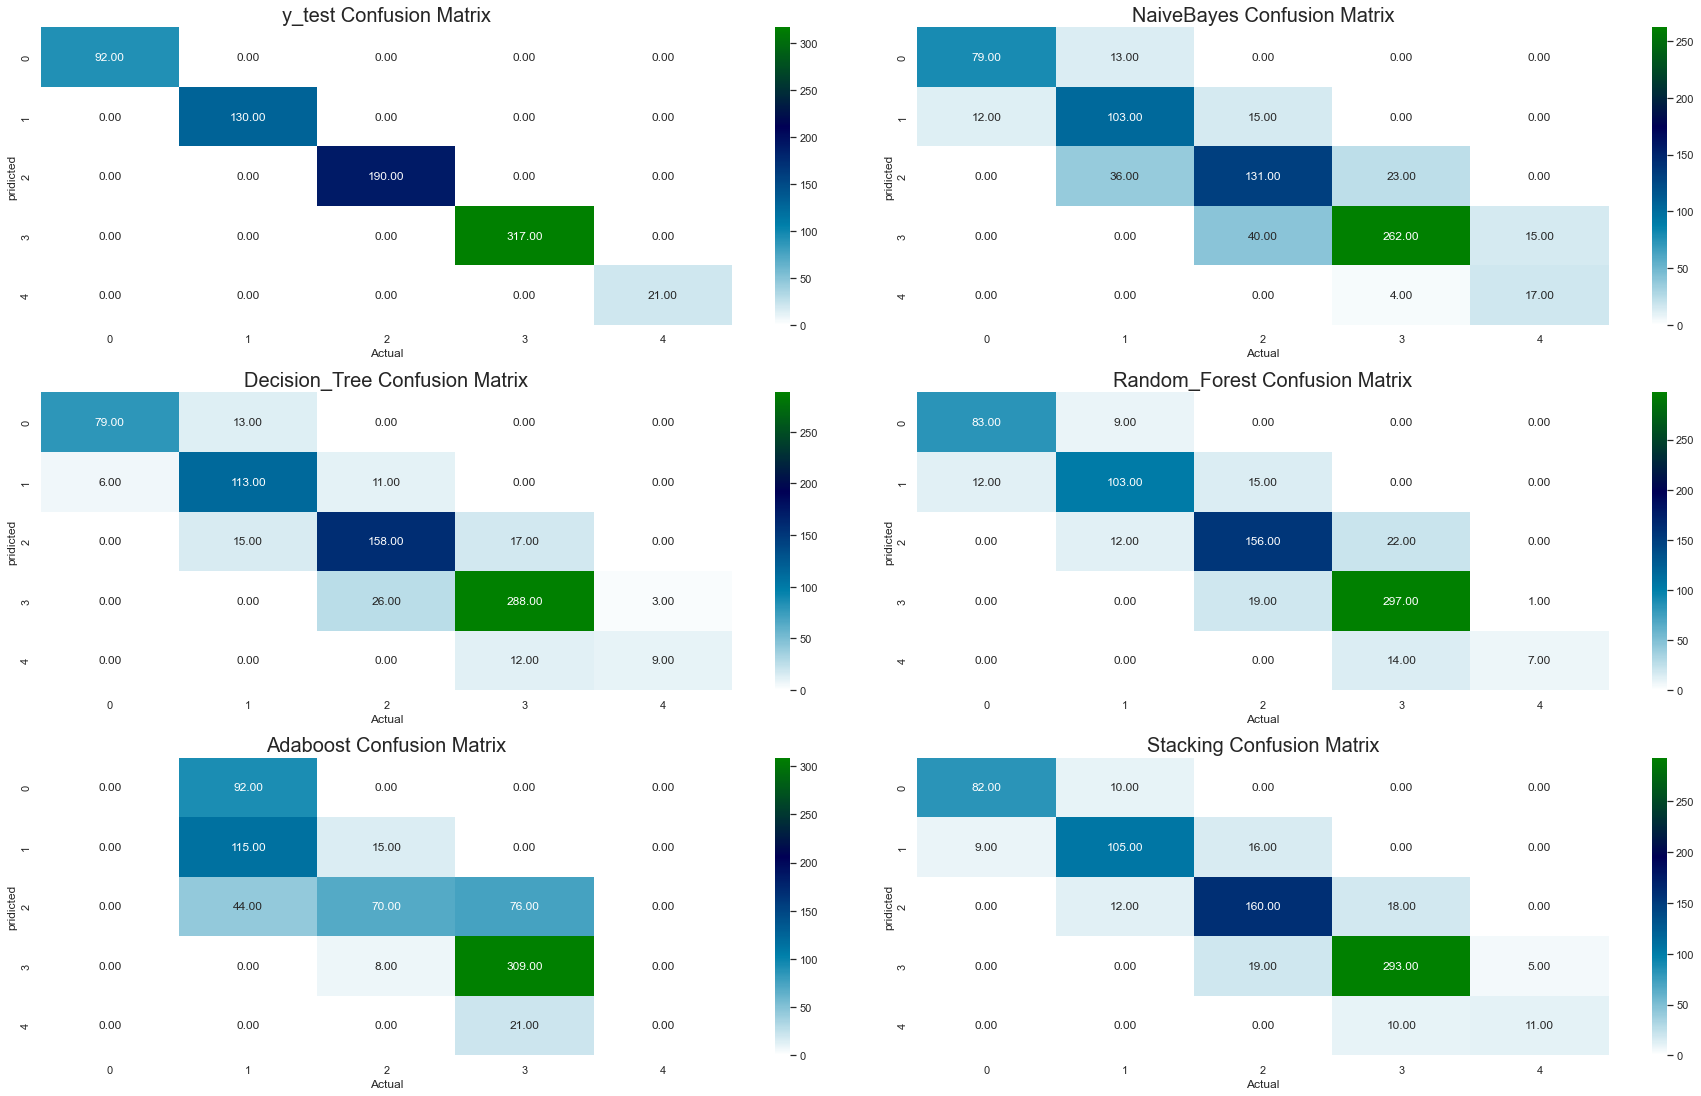

In [121]:
plt.figure(figsize = (25,20))
z=1
for i,mod in zip(predicted_hold_out.columns,model):
    confusion=confusion_matrix(y_test,predicted_hold_out[i])
    plt.subplot(4,2,z)
    sb.heatmap(confusion,annot=True,fmt='.2f',cmap='ocean_r')
    plt.title(f'{i} Confusion Matrix',fontsize=20)
    plt.xlabel('Actual')
    plt.ylabel('pridicted')
    z=z+1

plt.tight_layout()
plt.show()

**Kfold Confusion matrix**

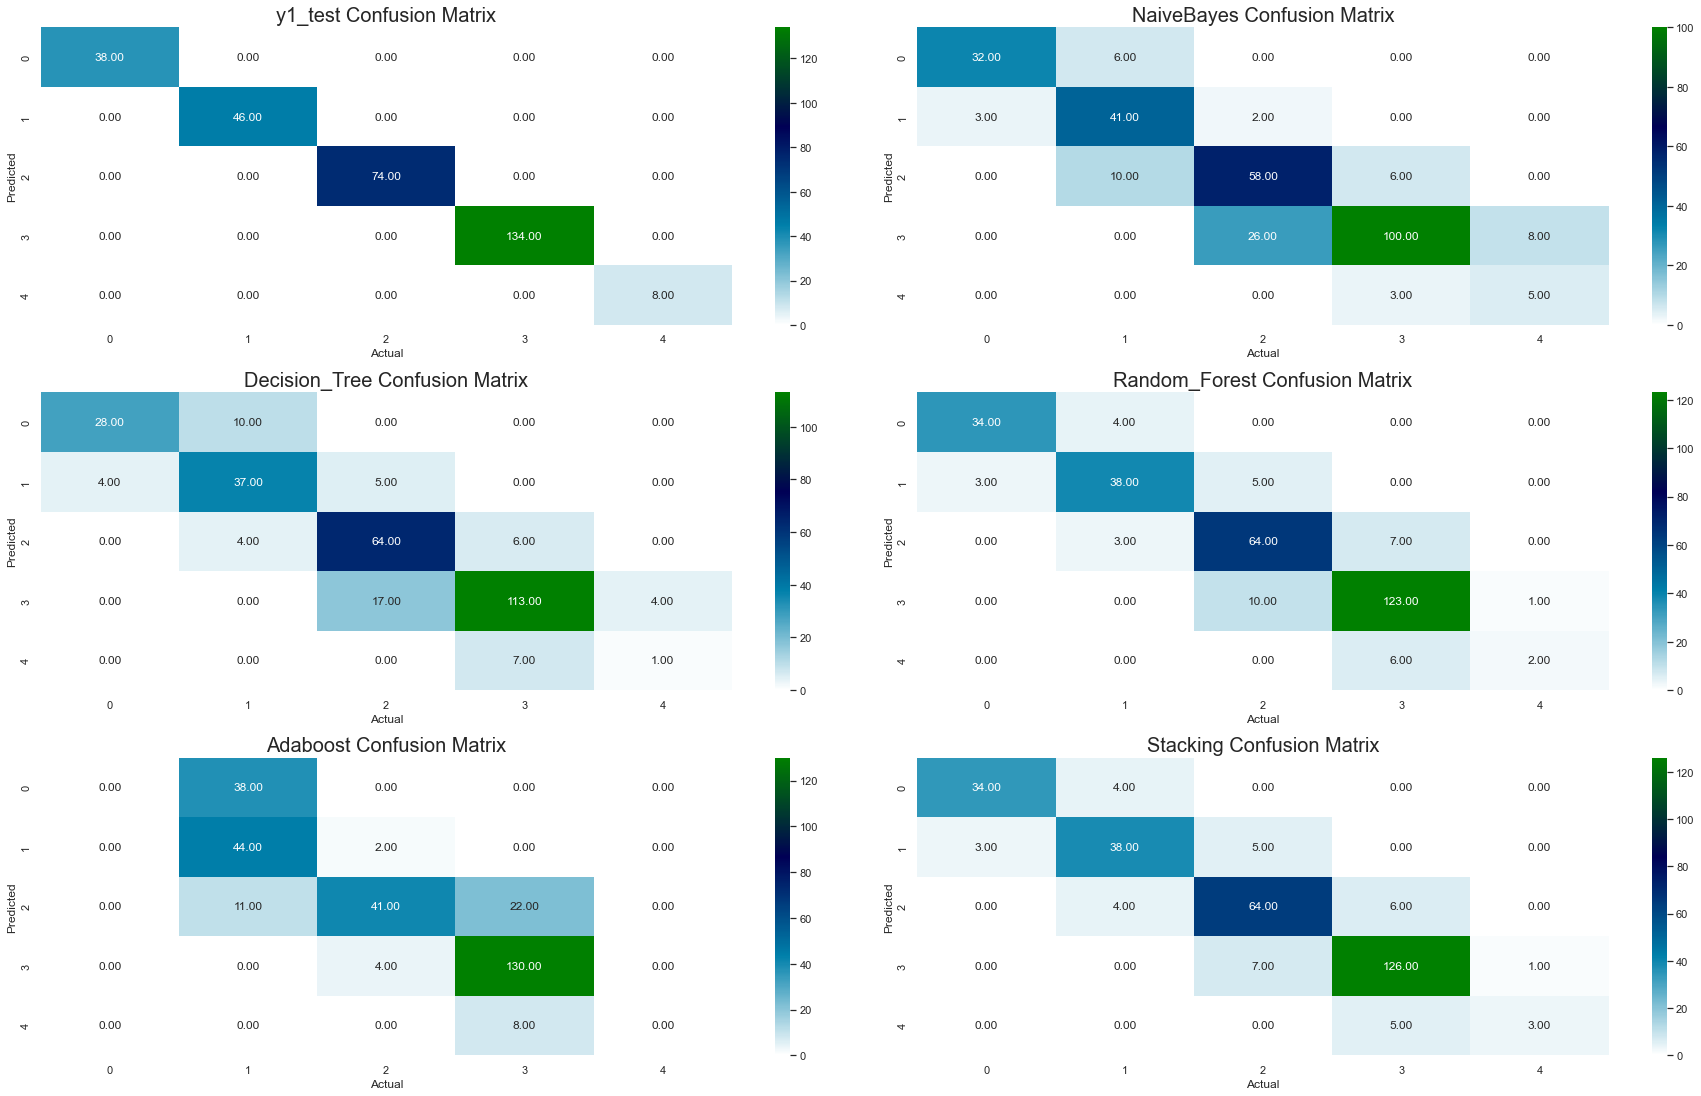

In [122]:
plt.figure(figsize = (25,20))
z=1
for i,mod in zip(predicted_kfold.columns,model):
    confusion=confusion_matrix(y1_test,predicted_kfold[i])
    plt.subplot(4,2,z)
    sb.heatmap(confusion,annot=True,fmt='.2f',cmap='ocean_r')
    plt.title(f'{i} Confusion Matrix',fontsize=20)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    z=z+1

plt.tight_layout()
plt.show()

**Stratified Kfold Confusion matrix**

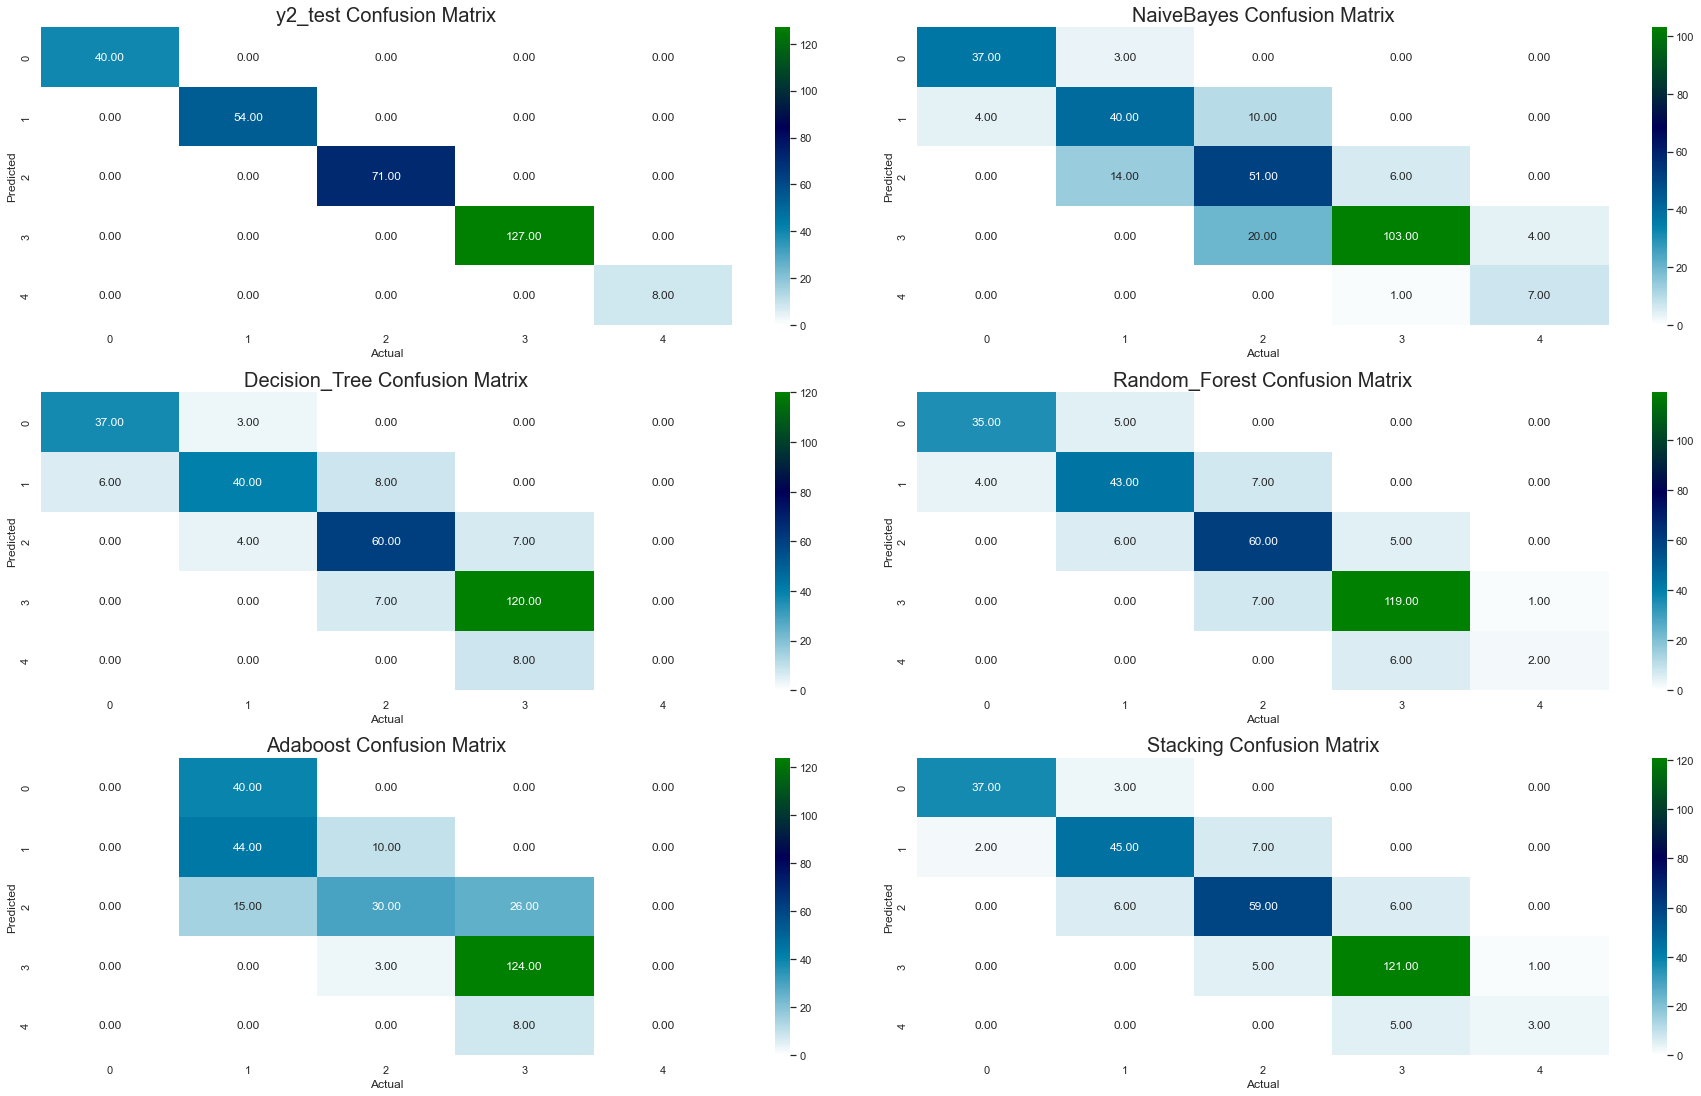

In [123]:
plt.figure(figsize = (25,20))
z=1
for i,mod in zip(predicted_stratifiedkfold.columns,model):
    confusion=confusion_matrix(y2_test,predicted_stratifiedkfold[i])
    plt.subplot(4,2,z)
    sb.heatmap(confusion,annot=True,fmt='.2f',cmap='ocean_r')
    plt.title(f'{i} Confusion Matrix',fontsize=20)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    z=z+1

plt.tight_layout()
plt.show()

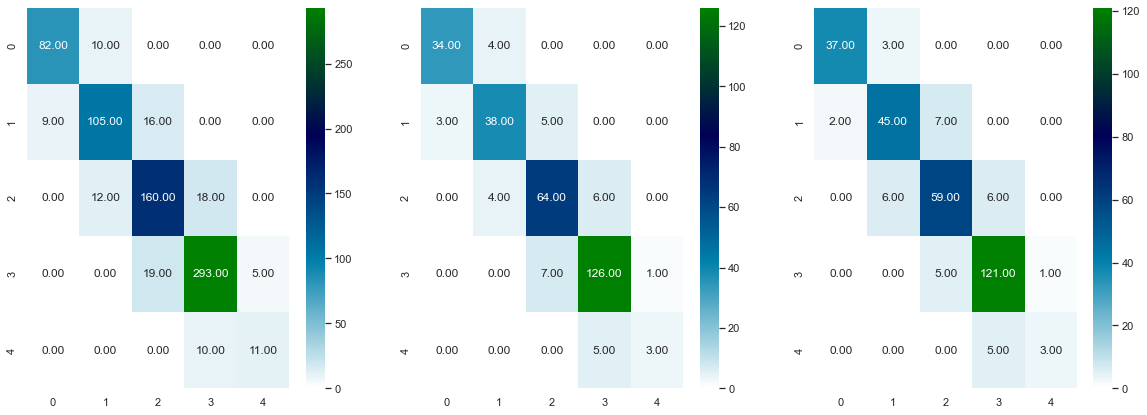

In [133]:
fig, ax = plt.subplots(1,3,figsize=(20,7))
# hold out
confusion=confusion_matrix(y_test,predicted_hold_out['Stacking'])
sb.heatmap(confusion,annot=True,fmt='.2f',cmap='ocean_r',ax = ax[0])
# kfold 
confusion1=confusion_matrix(y1_test,predicted_kfold['Stacking'])
sb.heatmap(confusion1,annot=True,fmt='.2f',cmap='ocean_r',ax = ax[1])
# stratified kfold
confusion2=confusion_matrix(y2_test,predicted_stratifiedkfold['Stacking'])
sb.heatmap(confusion2,annot=True,fmt='.2f',cmap='ocean_r',ax = ax[2])
plt.show()